# Monetización en Youtube con Machine Learning

#### Xiomy Diaz Morales - TFM Máster Universitario en Análisis y Visualización de Datos

## Exploración de datos

### Librerías

In [1]:
# Importar las bibliotecas principales
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configurar el estilo de las gráficas
sns.set(style="whitegrid")


### Dataset

In [2]:
# Cargar el dataset
file_path = '../data/dataset.csv'  
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

,ID,Date,Video Type,tag_map,partido_map,cat_match,content_type_map,Impressions,Likes,Comments,Shares,Video Views,Interactions,Avg_percentage_viewed,Watch_time_hours,Ingresos
0,****yZ_2XGk,7/20/2024,Short,Ninguno,Ninguno,Ninguno,Content_G,43346,269,18,7,6570,294,88.6500,42.0660,1.448
1,****kF_3svQ,7/18/2024,Short,tag_A,partido177,Otros,Content_J,106980,396,6,11,19541,413,86.6500,117.5791,4.330
2,****8d_7-Mk,6/17/2024,Video,tag_B,partido141,Otros,Content_N,54898,27,0,2,3777,29,0.5355,64.6095,0.000
3,****YZ_8JJA,6/20/2024,Short,tag_B,partido160,Otros,Content_J,29127,97,5,3,5457,105,0.4866,39.8284,0.000
4,****ge_an0Q,6/16/2024,Short,tag_B,partido152,Otros,Content_J,13583,61,0,2,1865,63,0.3725,11.3861,0.000


In [3]:
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Información general sobre el dataset
df.info()

# Resumen estadístico de las columnas numéricas
df.describe()

# Verificar si hay valores nulos
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     1800 non-null   object        
 1   Date                   1800 non-null   datetime64[ns]
 2   Video Type             1800 non-null   object        
 3   tag_map                1800 non-null   object        
 4   partido_map            1800 non-null   object        
 5   cat_match              1800 non-null   object        
 6   content_type_map       1800 non-null   object        
 7   Impressions            1800 non-null   int64         
 8   Likes                  1800 non-null   int64         
 9   Comments               1800 non-null   int64         
 10  Shares                 1800 non-null   int64         
 11  Video Views            1800 non-null   int64         
 12  Interactions           1800 non-null   int64         
 13  Avg

ID                       0
Date                     0
Video Type               0
tag_map                  0
partido_map              0
cat_match                0
content_type_map         0
Impressions              0
Likes                    0
Comments                 0
Shares                   0
Video Views              0
Interactions             0
Avg_percentage_viewed    0
Watch_time_hours         0
Ingresos                 0
dtype: int64

In [5]:
# Listar las columnas categóricas
categorical_cols = ['Video Type', 'tag_map',  'cat_match', 'content_type_map']

# Ver los valores únicos de cada columna categórica
for col in categorical_cols:
    print(f"Valores únicos en {col}: {df[col].unique()}")



Valores únicos en Video Type: ['Short' 'Video']
Valores únicos en tag_map: ['Ninguno' 'tag_A' 'tag_B' 'tag_C' 'tag_D' 'tag_E' 'tag_J' 'tag_H' 'tag_G'
 'tag_I' 'tag_F']
Valores únicos en cat_match: ['Ninguno' 'Otros' 'Semifinal' 'Final' 'Cuartos']
Valores únicos en content_type_map: ['Content_G' 'Content_J' 'Content_N' 'Content_B' 'Content_S' 'Content_F'
 'Content_V' 'Content_K' 'Content_W' 'Content_O' 'Content_Q' 'Content_I'
 'Content_E' 'Content_L' 'Content_R' 'Content_D' 'Content_P' 'Content_U'
 'Content_M' 'Content_C' 'Content_H' 'Content_A' 'Content_T']


In [6]:
# Estadísticas descriptivas para variables numéricas
numeric_stats = df.describe(include=[pd.np.number])  # Estadísticas numéricas
print("Estadísticas Descriptivas para Variables Numéricas:")
print(numeric_stats)

# Estadísticas descriptivas para variables categóricas
categorical_stats = df.describe(include=[object])  # Estadísticas categóricas
print("\nEstadísticas Descriptivas para Variables Categóricas:")
print(categorical_stats)

Estadísticas Descriptivas para Variables Numéricas:
        Impressions        Likes     Comments       Shares    Video Views  \
count  1.800000e+03  1800.000000  1800.000000  1800.000000    1800.000000   
mean   2.594245e+05   372.565000    33.918889    41.368889   34788.382222   
std    7.618014e+05   917.982637   115.818978   145.055722   96544.894168   
min    1.114000e+03     2.000000     0.000000     0.000000      93.000000   
25%    2.772675e+04    37.000000     1.000000     1.000000    2757.750000   
50%    4.933350e+04    80.000000     4.000000     4.000000    5689.500000   
75%    1.126948e+05   224.500000    17.250000    18.000000   17256.250000   
max    6.554344e+06  9008.000000  2979.000000  2913.000000  876577.000000   

       Interactions  Avg_percentage_viewed  Watch_time_hours      Ingresos  
count   1800.000000            1800.000000       1800.000000   1800.000000  
mean     447.852778              12.521820       3118.535142    285.656464  
std     1100.856148    

/var/folders/rc/05ndkbzs52vc0w2nl67b9jd80000gq/T/ipykernel_64773/3422832778.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  numeric_stats = df.describe(include=[pd.np.number])  # Estadísticas numéricas


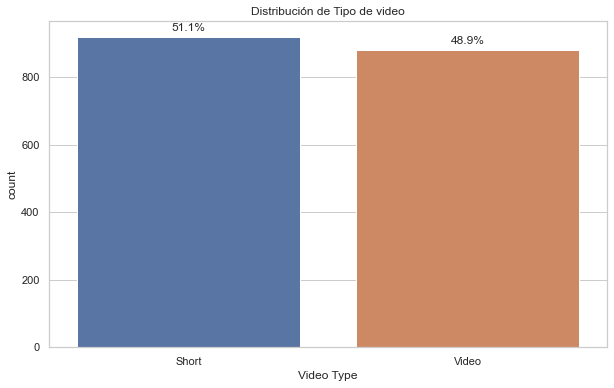

In [5]:
# Tipo de video
ordered_content_types = df['Video Type'].value_counts().index

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Video Type', data=df, order=ordered_content_types)

# Calcular los porcentajes
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribución de Tipo de video')

plt.show()

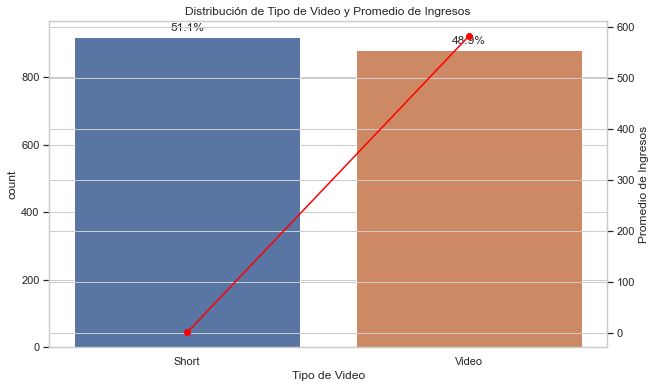

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded into a DataFrame called 'df'

# Calculate average income per video type
avg_income_per_type = df.groupby('Video Type')['Ingresos'].mean()

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Video Type', data=df, order=ordered_content_types)

# Calcular los porcentajes y añadirlos al gráfico de barras
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.1f}%', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

# Agregar una línea para el promedio de ingresos
ax2 = ax.twinx()  # Crear un segundo eje y
ax2.plot(avg_income_per_type.index, avg_income_per_type.values, color='red', marker='o')
ax2.set_ylabel('Promedio de Ingresos')

# Personalizar los ejes y títulos
plt.title('Distribución de Tipo de Video y Promedio de Ingresos')
ax.set_xlabel('Tipo de Video')

plt.show()

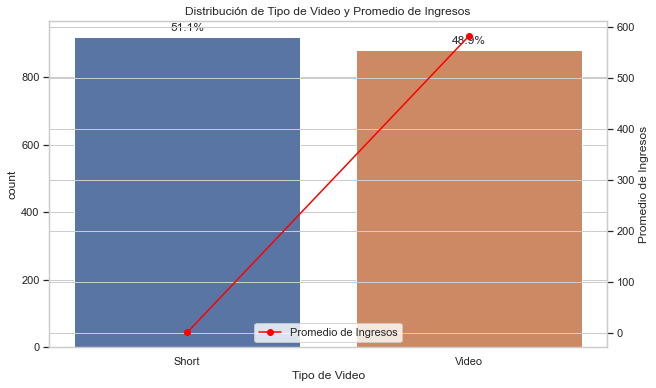

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded into a DataFrame called 'df'

# Calculate average income per video type
avg_income_per_type = df.groupby('Video Type')['Ingresos'].mean()

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Video Type', data=df, order=ordered_content_types)

# Calcular los porcentajes y añadirlos al gráfico de barras
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.1f}%', 
                 (p.get_x() + p.get_width() / 2., height),
                 ha='center', va='center',
                 xytext=(0, 9),
                 textcoords='offset points')

# Agregar una línea para el promedio de ingresos con etiqueta
ax2 = ax.twinx()  # Crear un segundo eje y
ax2.plot(avg_income_per_type.index, avg_income_per_type.values, color='red', marker='o', label='Promedio de Ingresos')
ax2.set_ylabel('Promedio de Ingresos')

# Personalizar los ejes y títulos
plt.title('Distribución de Tipo de Video y Promedio de Ingresos')
ax.set_xlabel('Tipo de Video')

# Agregar leyenda
plt.legend()
plt.legend(loc='lower center')

plt.show()

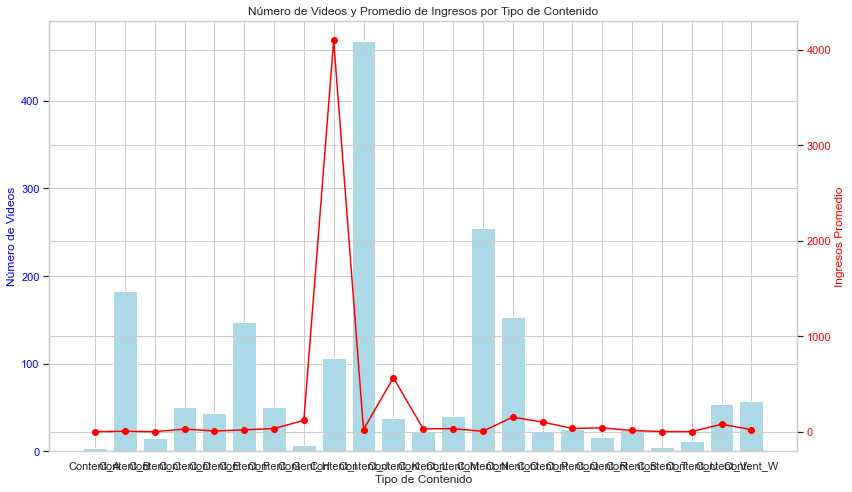

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_A', 'Content_B', 'Content_C', 'Content_D', 'Content_E', 'Content_F', 'Content_G', 
                     'Content_H', 'Content_I', 'Content_J', 'Content_K', 'Content_L', 'Content_M', 'Content_N', 
                     'Content_O', 'Content_P', 'Content_Q', 'Content_R', 'Content_S', 'Content_T', 'Content_U', 
                     'Content_V', 'Content_W'],
    'Numero_de_Videos': [4, 183, 15, 51, 44, 147, 50, 7, 107, 468, 38, 23, 40, 255, 153, 22, 25, 16, 24, 5, 12, 54, 57],
    'Ingresos': [0.0725, 4.494377049, 0, 27.56788235, 7.205295455, 18.66003401, 33.08762, 118.5302857, 4099.465196, 
                 22.21147863, 565.7335, 29.8726087, 31.758275, 4.24167451, 152.7559869, 100.901, 33.77276, 40.2196875, 
                 12.52858333, 1.0146, 0.7750833333, 77.68687037, 21.83577193]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 7))

# Gráfico de barras (Número de Videos)
ax1.bar(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_xlabel('Tipo de Contenido')
ax1.set_ylabel('Número de Videos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Crear segundo eje Y para Ingresos
ax2 = ax1.twinx()
ax2.plot(df['Content_Type'], df['Ingresos'], color='red', marker='o', label='Ingresos')
ax2.set_ylabel('Ingresos Promedio', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Ingresos por Tipo de Contenido')
plt.xticks(rotation=45)
fig.tight_layout()

# Mostrar gráfico
plt.show()


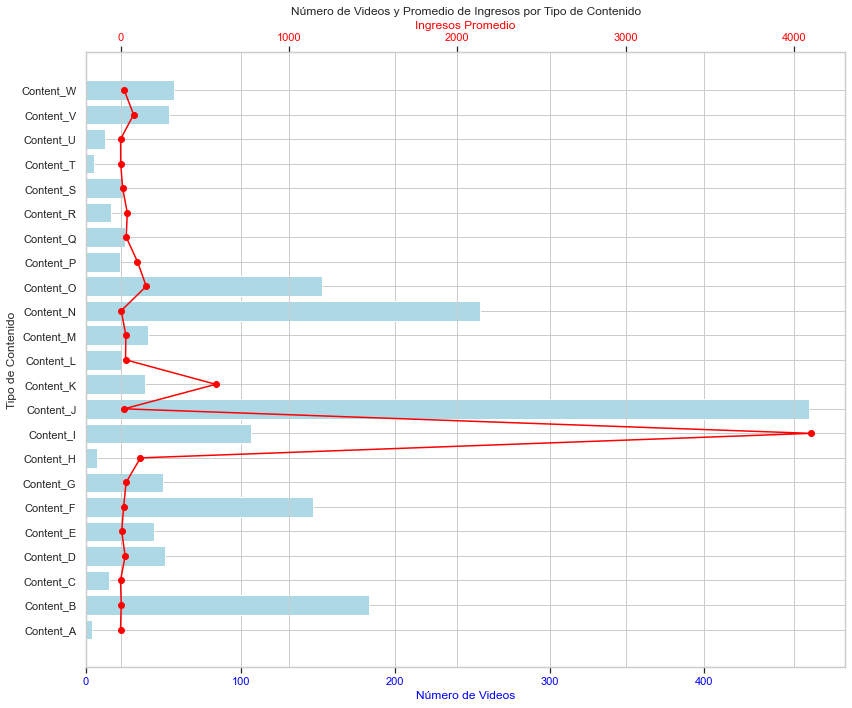

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_A', 'Content_B', 'Content_C', 'Content_D', 'Content_E', 'Content_F', 'Content_G', 
                     'Content_H', 'Content_I', 'Content_J', 'Content_K', 'Content_L', 'Content_M', 'Content_N', 
                     'Content_O', 'Content_P', 'Content_Q', 'Content_R', 'Content_S', 'Content_T', 'Content_U', 
                     'Content_V', 'Content_W'],
    'Numero_de_Videos': [4, 183, 15, 51, 44, 147, 50, 7, 107, 468, 38, 23, 40, 255, 153, 22, 25, 16, 24, 5, 12, 54, 57],
    'Ingresos': [0.0725, 4.494377049, 0, 27.56788235, 7.205295455, 18.66003401, 33.08762, 118.5302857, 4099.465196, 
                 22.21147863, 565.7335, 29.8726087, 31.758275, 4.24167451, 152.7559869, 100.901, 33.77276, 40.2196875, 
                 12.52858333, 1.0146, 0.7750833333, 77.68687037, 21.83577193]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Ingresos
ax2 = ax1.twiny()
ax2.plot(df['Ingresos'], df['Content_Type'], color='red', marker='o', label='Ingresos')
ax2.set_xlabel('Ingresos Promedio', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Ingresos por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


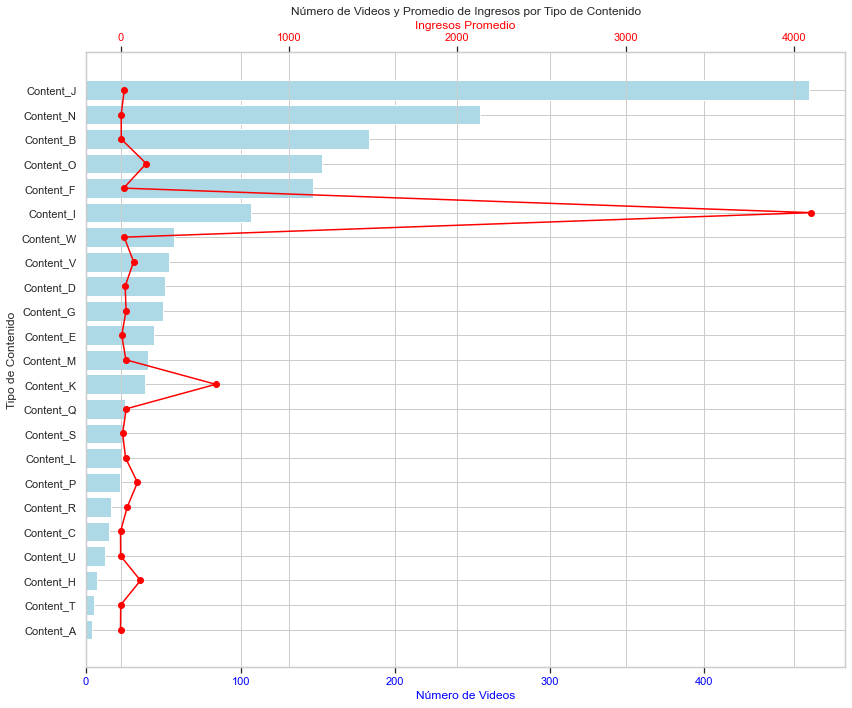

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_A', 'Content_B', 'Content_C', 'Content_D', 'Content_E', 'Content_F', 'Content_G', 
                     'Content_H', 'Content_I', 'Content_J', 'Content_K', 'Content_L', 'Content_M', 'Content_N', 
                     'Content_O', 'Content_P', 'Content_Q', 'Content_R', 'Content_S', 'Content_T', 'Content_U', 
                     'Content_V', 'Content_W'],
    'Numero_de_Videos': [4, 183, 15, 51, 44, 147, 50, 7, 107, 468, 38, 23, 40, 255, 153, 22, 25, 16, 24, 5, 12, 54, 57],
    'Ingresos': [0.0725, 4.494377049, 0, 27.56788235, 7.205295455, 18.66003401, 33.08762, 118.5302857, 4099.465196, 
                 22.21147863, 565.7335, 29.8726087, 31.758275, 4.24167451, 152.7559869, 100.901, 33.77276, 40.2196875, 
                 12.52858333, 1.0146, 0.7750833333, 77.68687037, 21.83577193]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ordenar por Número de Videos en orden descendente
df = df.sort_values('Numero_de_Videos', ascending=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Ingresos
ax2 = ax1.twiny()
ax2.plot(df['Ingresos'], df['Content_Type'], color='red', marker='o', label='Ingresos')
ax2.set_xlabel('Ingresos Promedio', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Ingresos por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


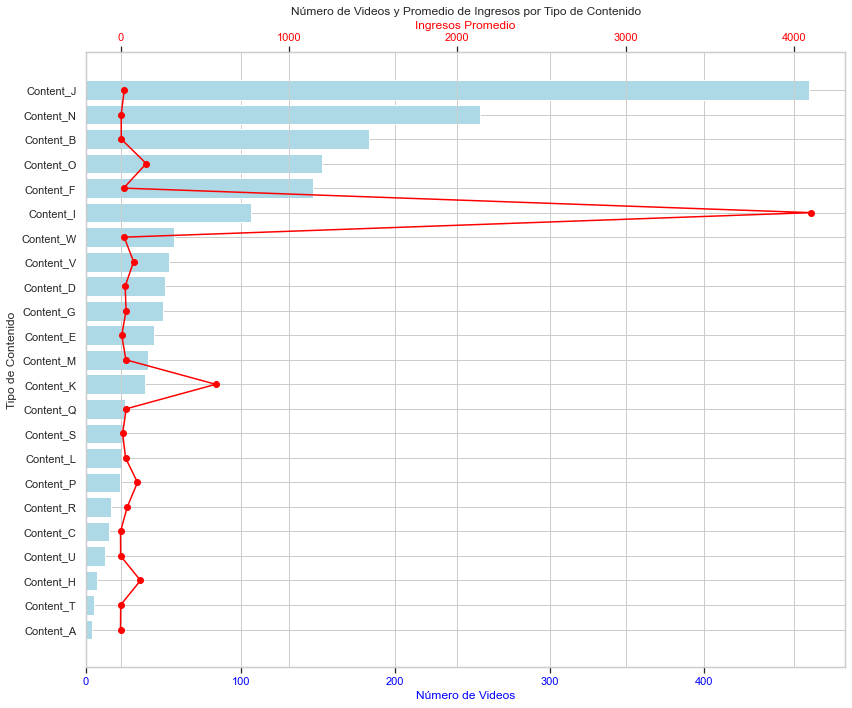

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_A', 'Content_B', 'Content_C', 'Content_D', 'Content_E', 'Content_F', 'Content_G', 
                     'Content_H', 'Content_I', 'Content_J', 'Content_K', 'Content_L', 'Content_M', 'Content_N', 
                     'Content_O', 'Content_P', 'Content_Q', 'Content_R', 'Content_S', 'Content_T', 'Content_U', 
                     'Content_V', 'Content_W'],
    'Numero_de_Videos': [4, 183, 15, 51, 44, 147, 50, 7, 107, 468, 38, 23, 40, 255, 153, 22, 25, 16, 24, 5, 12, 54, 57],
    'Ingresos': [0.0725, 4.494377049, 0, 27.56788235, 7.205295455, 18.66003401, 33.08762, 118.5302857, 4099.465196, 
                 22.21147863, 565.7335, 29.8726087, 31.758275, 4.24167451, 152.7559869, 100.901, 33.77276, 40.2196875, 
                 12.52858333, 1.0146, 0.7750833333, 77.68687037, 21.83577193]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ordenar por Número de Videos en orden descendente
df = df.sort_values('Numero_de_Videos', ascending=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Ingresos
ax2 = ax1.twiny()
ax2.plot(df['Ingresos'], df['Content_Type'], color='red', marker='o', label='Ingresos')
ax2.set_xlabel('Ingresos Promedio', color='red')
ax2.tick_params(axis='x', labelcolor='red')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Ingresos por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


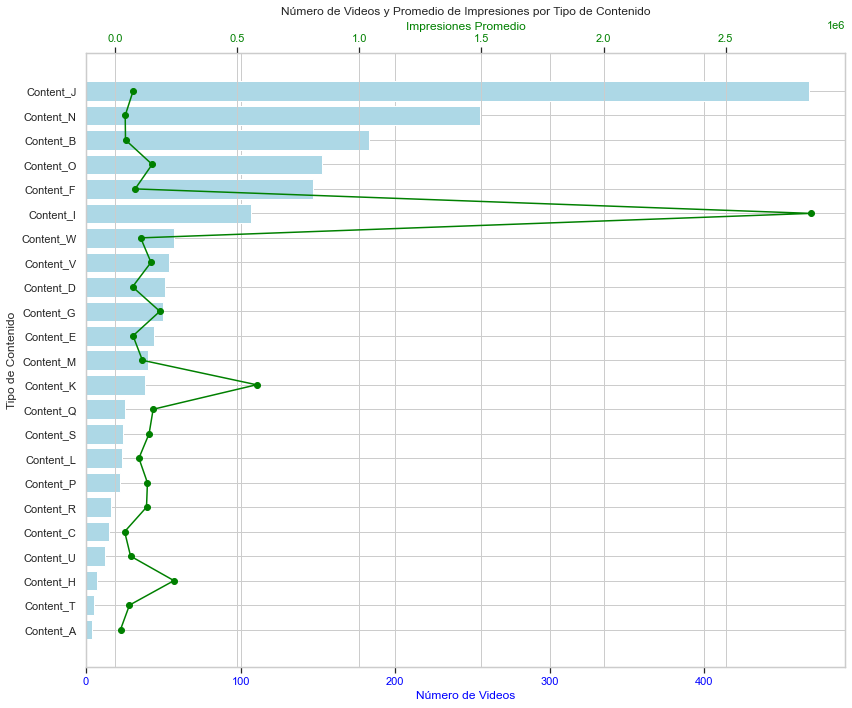

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos actualizados
data = {
    'Content_Type': ['Content_A', 'Content_B', 'Content_C', 'Content_D', 'Content_E', 'Content_F', 'Content_G', 
                     'Content_H', 'Content_I', 'Content_J', 'Content_K', 'Content_L', 'Content_M', 'Content_N', 
                     'Content_O', 'Content_P', 'Content_Q', 'Content_R', 'Content_S', 'Content_T', 'Content_U', 
                     'Content_V', 'Content_W'],
    'Numero_de_Videos': [4, 183, 15, 51, 44, 147, 50, 7, 107, 468, 38, 23, 40, 255, 153, 22, 25, 16, 24, 5, 12, 54, 57],
    'Impresiones': [22037, 42494, 38920, 71218, 73228, 81809, 183097, 240885, 2848207, 73654, 579060, 97312, 111764, 
                    41237, 151622, 132277, 155731, 128486, 139028, 58718, 63240, 146882, 104559]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ordenar por Número de Videos en orden ascendente
df = df.sort_values('Numero_de_Videos', ascending=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Impresiones
ax2 = ax1.twiny()
ax2.plot(df['Impresiones'], df['Content_Type'], color='green', marker='o', label='Impresiones')
ax2.set_xlabel('Impresiones Promedio', color='green')
ax2.tick_params(axis='x', labelcolor='green')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Impresiones por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


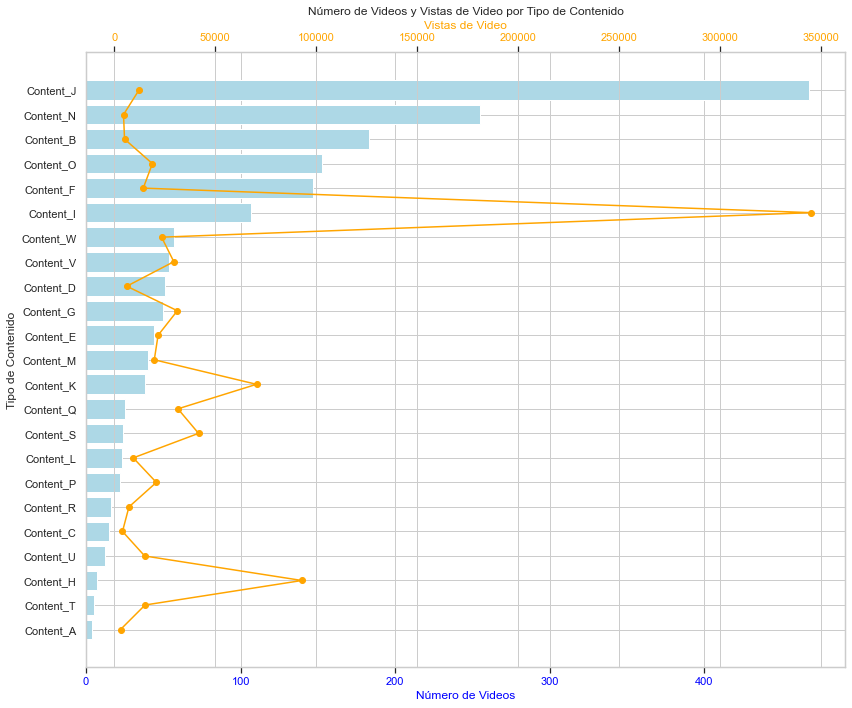

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_W', 'Content_V', 'Content_U', 'Content_T', 'Content_S', 'Content_R', 'Content_Q', 
                     'Content_P', 'Content_O', 'Content_N', 'Content_M', 'Content_L', 'Content_K', 'Content_J', 
                     'Content_I', 'Content_H', 'Content_G', 'Content_F', 'Content_E', 'Content_D', 'Content_C', 
                     'Content_B', 'Content_A'],
    'Numero_de_Videos': [57, 54, 12, 5, 24, 16, 25, 22, 153, 255, 40, 23, 38, 468, 107, 7, 50, 147, 44, 51, 15, 183, 4],
    'Vistas_de_Video': [23482, 29540, 15116, 15296, 41791, 7318, 31571, 20887, 18915, 4630, 19862, 9449, 70491, 12300, 
                        345011, 92999, 31289, 14402, 21747, 6241, 4116, 5130, 3136]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ordenar por Número de Videos en orden descendente
df = df.sort_values('Numero_de_Videos', ascending=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Vistas de Video
ax2 = ax1.twiny()
ax2.plot(df['Vistas_de_Video'], df['Content_Type'], color='orange', marker='o', label='Vistas de Video')
ax2.set_xlabel('Vistas de Video', color='orange')
ax2.tick_params(axis='x', labelcolor='orange')

# Título y ajustes finales
plt.title('Número de Videos y Vistas de Video por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


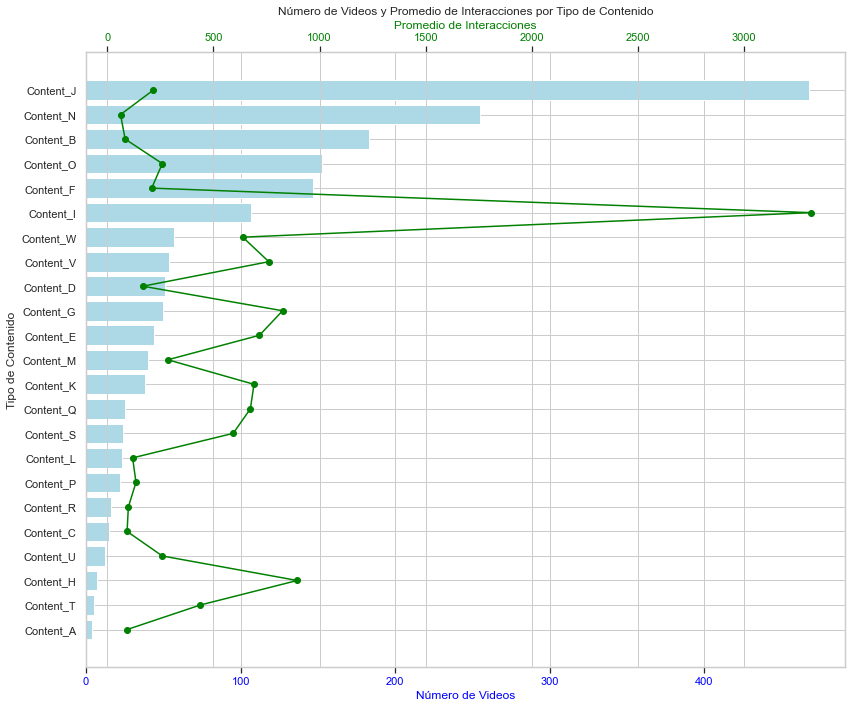

In [56]:
# interactions
import pandas as pd
import matplotlib.pyplot as plt

# Datos
data = {
    'Content_Type': ['Content_W', 'Content_V', 'Content_U', 'Content_T', 'Content_S', 'Content_R', 'Content_Q', 
                     'Content_P', 'Content_O', 'Content_N', 'Content_M', 'Content_L', 'Content_K', 'Content_J', 
                     'Content_I', 'Content_H', 'Content_G', 'Content_F', 'Content_E', 'Content_D', 'Content_C', 
                     'Content_B', 'Content_A'],
    'Numero_de_Videos': [57, 54, 12, 5, 24, 16, 25, 22, 153, 255, 40, 23, 38, 468, 107, 7, 50, 147, 44, 51, 15, 183, 4],
    'Promedio_de_Interacciones': [638, 761, 259, 438, 593, 99, 674, 135, 259, 62, 285, 119, 691, 217, 3315, 895, 
                                  826, 209, 717, 167, 93, 84, 93]
}

# Convertir a DataFrame
df = pd.DataFrame(data)

# Ordenar por Número de Videos en orden descendente
df = df.sort_values('Numero_de_Videos', ascending=True)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12, 10))  # Ajustar el tamaño para visualización clara

# Gráfico de barras horizontales (Número de Videos)
ax1.barh(df['Content_Type'], df['Numero_de_Videos'], color='lightblue', label='Número de Videos')
ax1.set_ylabel('Tipo de Contenido')
ax1.set_xlabel('Número de Videos', color='blue')
ax1.tick_params(axis='x', labelcolor='blue')

# Crear segundo eje X para Promedio de Interacciones
ax2 = ax1.twiny()
ax2.plot(df['Promedio_de_Interacciones'], df['Content_Type'], color='green', marker='o', label='Promedio de Interacciones')
ax2.set_xlabel('Promedio de Interacciones', color='green')
ax2.tick_params(axis='x', labelcolor='green')

# Título y ajustes finales
plt.title('Número de Videos y Promedio de Interacciones por Tipo de Contenido')
plt.tight_layout()

# Mostrar gráfico
plt.show()


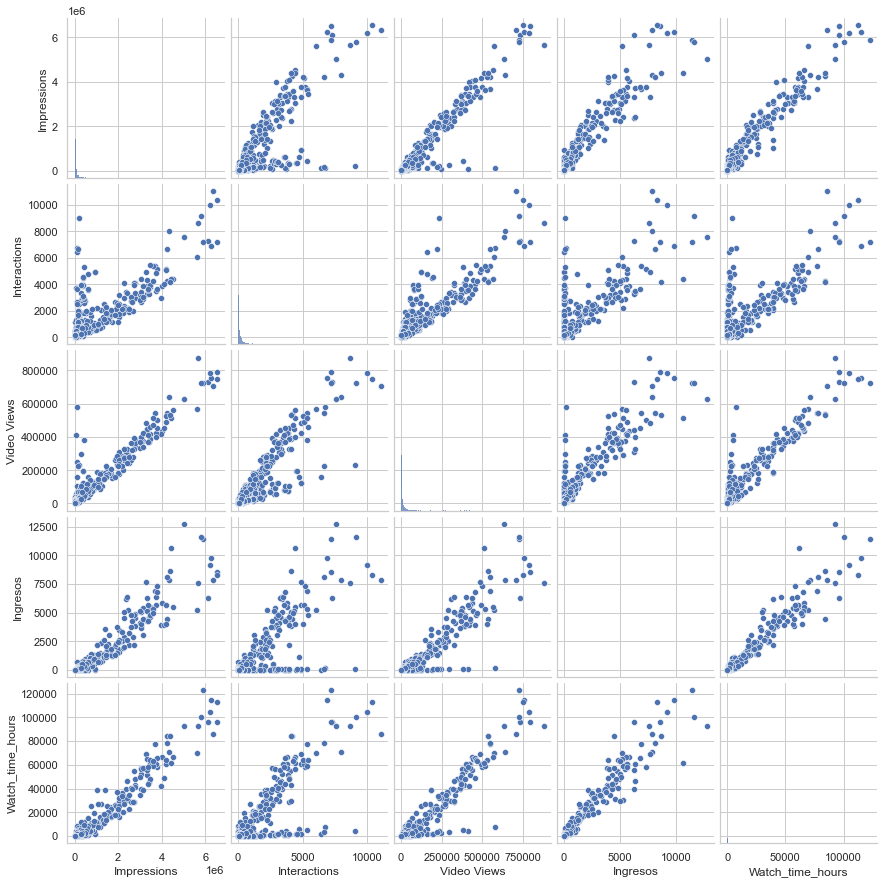

In [13]:
import seaborn as sns

# Crear el gráfico de dispersión de pares
sns.pairplot(df, vars=['Impressions', 'Interactions', 'Video Views', 'Ingresos', 'Watch_time_hours'])
plt.show()

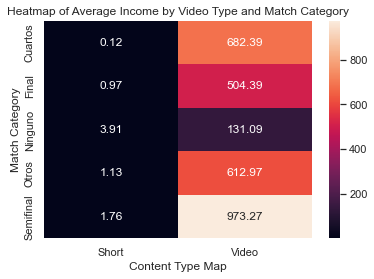

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded into a DataFrame called 'df'

# Create a contingency table to show the co-occurrence of 'cat_match' and 'content_type_map' and their effect on 'Ingresos'
contingency_table = pd.crosstab(df['cat_match'], df['Video Type'], values=df['Ingresos'], aggfunc=np.mean)

# Create a heatmap using seaborn
sns.heatmap(contingency_table, annot=True, fmt=".2f")
plt.title('Heatmap of Average Income by Video Type and Match Category')
plt.xlabel('Content Type Map')
plt.ylabel('Match Category')
plt.show()

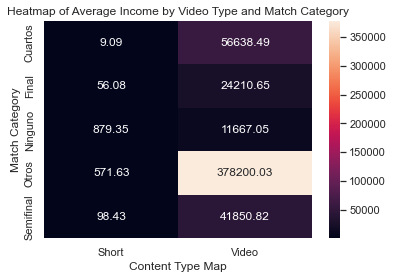

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming your data is loaded into a DataFrame called 'df'

# Create a contingency table to show the co-occurrence of 'cat_match' and 'content_type_map' and their effect on 'Ingresos'
contingency_table = pd.crosstab(df['cat_match'], df['Video Type'], values=df['Ingresos'], aggfunc=np.sum)

# Create a heatmap using seaborn
sns.heatmap(contingency_table, annot=True, fmt=".2f")
plt.title('Heatmap of Average Income by Video Type and Match Category')
plt.xlabel('Content Type Map')
plt.ylabel('Match Category')
plt.show()

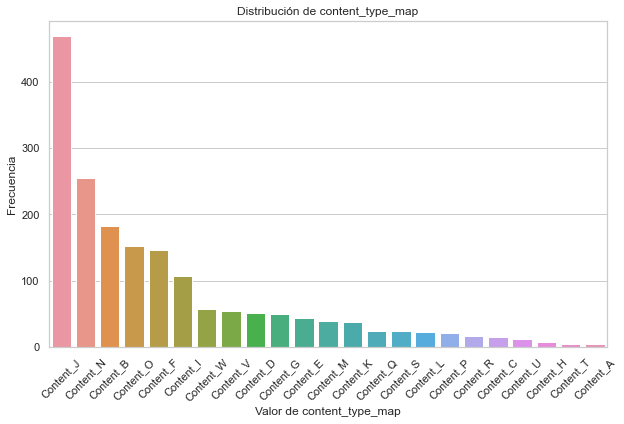

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes un DataFrame llamado 'df' con una columna 'content_type_map'

# Contar la frecuencia de cada valor en 'content_type_map'
value_counts = df['content_type_map'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts)
plt.xlabel('Valor de content_type_map')
plt.ylabel('Frecuencia')
plt.title('Distribución de content_type_map')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si son muy largas
plt.show()

Los contenidos J, N, B y O son los contenidos más recurrentes, combinados representan el 59% de los videos

In [8]:
import pandas as pd

# Calcular las medias redondeadas para las métricas relevantes por tipo de contenido
avg_revenue = df.groupby('content_type_map')['Ingresos'].mean().round(2)
avg_impressions = df.groupby('content_type_map')['Impressions'].mean().round(2)
avg_views = df.groupby('content_type_map')['Video Views'].mean().round(2)
avg_interactions = df.groupby('content_type_map')['Interactions'].mean().round(2)

# Calcular el recuento de videos por tipo de contenido
count_videos = df.groupby('content_type_map').size()

# Crear una tabla consolidada con todas las métricas
consolidated_table = pd.DataFrame({
    'Tipo de Contenido': avg_revenue.index,
    'Recuento de Videos': count_videos.values,
    'Promedio de Ingresos': avg_revenue.values,
    'Promedio de Impresiones': avg_impressions.values,
    'Promedio de Vistas': avg_views.values,
    'Promedio de Interacciones': avg_interactions.values
})

# Ordenar la tabla por el recuento de videos de forma descendente
consolidated_table = consolidated_table.sort_values(by='Recuento de Videos', ascending=False)

print("Tabla Consolidada: Métricas por Tipo de Contenido")
print(consolidated_table)


Tabla Consolidada: Métricas por Tipo de Contenido
   Tipo de Contenido  Recuento de Videos  Promedio de Ingresos  \
9          Content_J                 468                 22.21   
13         Content_N                 255                  4.24   
1          Content_B                 183                  4.49   
14         Content_O                 153                152.76   
5          Content_F                 147                 18.66   
8          Content_I                 107               4099.47   
22         Content_W                  57                 21.84   
21         Content_V                  54                 77.69   
3          Content_D                  51                 27.57   
6          Content_G                  50                 33.09   
4          Content_E                  44                  7.21   
12         Content_M                  40                 31.76   
10         Content_K                  38                565.73   
16         Content_Q      

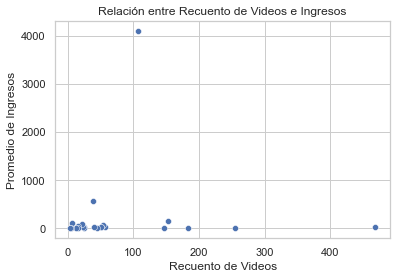

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de dispersión: Recuento de videos vs. Ingresos
sns.scatterplot(x='Recuento de Videos', y='Promedio de Ingresos', data=consolidated_table)
plt.title('Relación entre Recuento de Videos e Ingresos')
plt.xlabel('Recuento de Videos')
plt.ylabel('Promedio de Ingresos')
plt.show()

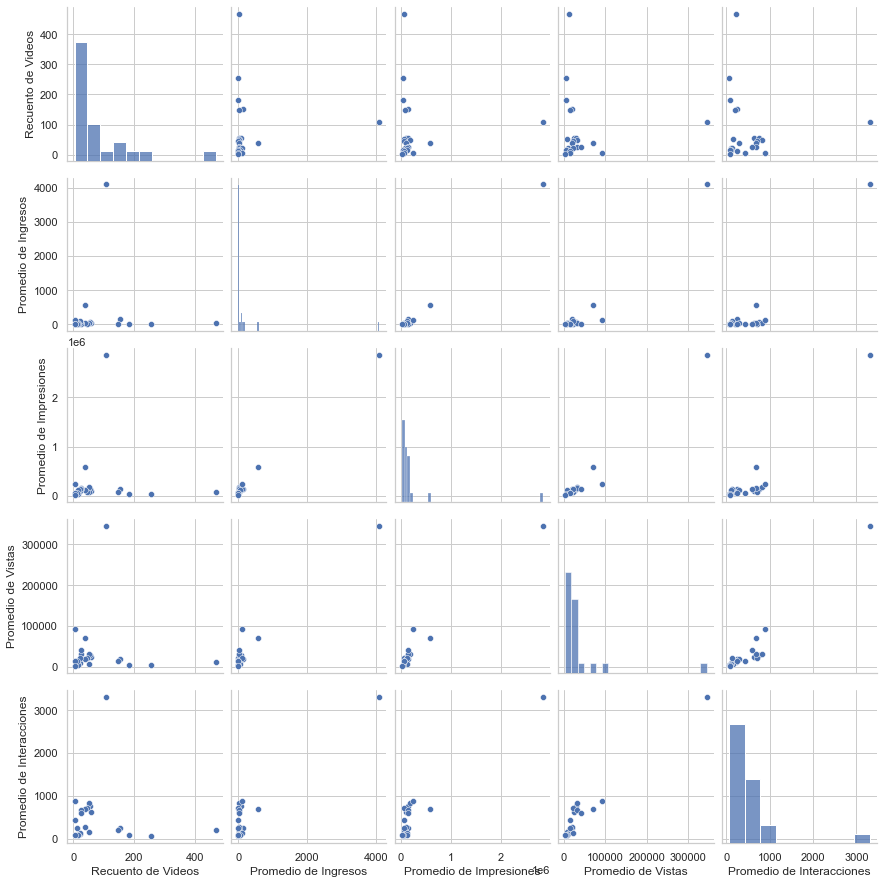

In [9]:
import seaborn as sns

# Crear el gráfico de dispersión de pares
sns.pairplot(consolidated_table, vars=['Recuento de Videos', 'Promedio de Ingresos', 'Promedio de Impresiones', 'Promedio de Vistas', 'Promedio de Interacciones'])
plt.show()

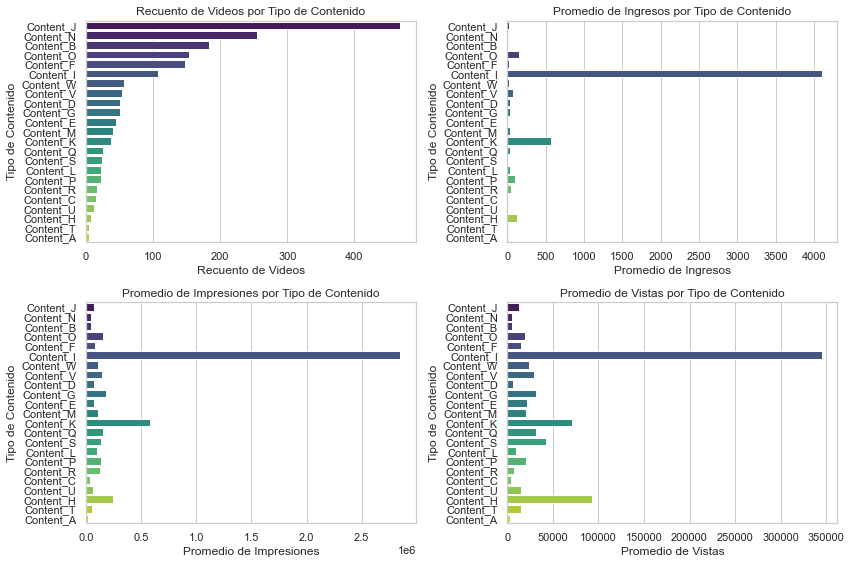

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular las medias redondeadas para las métricas relevantes por tipo de contenido
avg_revenue = df.groupby('content_type_map')['Ingresos'].mean().round(2)
avg_impressions = df.groupby('content_type_map')['Impressions'].mean().round(2)
avg_views = df.groupby('content_type_map')['Video Views'].mean().round(2)
avg_interactions = df.groupby('content_type_map')['Interactions'].mean().round(2)

# Calcular el recuento de videos por tipo de contenido
count_videos = df.groupby('content_type_map').size()

# Crear una tabla consolidada con todas las métricas
consolidated_table = pd.DataFrame({
    'Tipo de Contenido': avg_revenue.index,
    'Recuento de Videos': count_videos.values,
    'Promedio de Ingresos': avg_revenue.values,
    'Promedio de Impresiones': avg_impressions.values,
    'Promedio de Vistas': avg_views.values,
    'Promedio de Interacciones': avg_interactions.values
})

# Ordenar la tabla por el recuento de videos de forma descendente
consolidated_table = consolidated_table.sort_values(by='Recuento de Videos', ascending=False)

# Configuración de gráficos
plt.figure(figsize=(12, 8))

# Gráfico de barras horizontales para el recuento de videos
plt.subplot(2, 2, 1)
sns.barplot(x='Recuento de Videos', y='Tipo de Contenido', data=consolidated_table, palette='viridis')
plt.title('Recuento de Videos por Tipo de Contenido')

# Gráfico de barras horizontales para el promedio de ingresos
plt.subplot(2, 2, 2)
sns.barplot(x='Promedio de Ingresos', y='Tipo de Contenido', data=consolidated_table, palette='viridis')
plt.title('Promedio de Ingresos por Tipo de Contenido')

# Gráfico de barras horizontales para el promedio de impresiones
plt.subplot(2, 2, 3)
sns.barplot(x='Promedio de Impresiones', y='Tipo de Contenido', data=consolidated_table, palette='viridis')
plt.title('Promedio de Impresiones por Tipo de Contenido')

# Gráfico de barras horizontales para el promedio de vistas
plt.subplot(2, 2, 4)
sns.barplot(x='Promedio de Vistas', y='Tipo de Contenido', data=consolidated_table, palette='viridis')
plt.title('Promedio de Vistas por Tipo de Contenido')

plt.tight_layout()
plt.show()


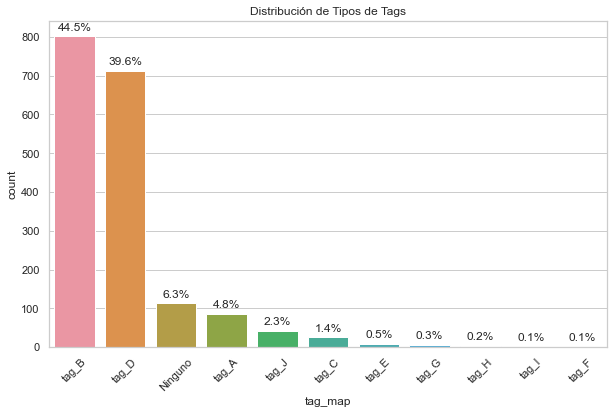

In [52]:
# Frecuencia de los Tags
ordered_tag_map = df['tag_map'].value_counts().index

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='tag_map', data=df, order=ordered_tag_map)

# Calcular los porcentajes
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribución de Tipos de Tags')
plt.xticks(rotation=45)  # Opcional: Rotar etiquetas para mayor legibilidad
plt.show()

El 84% de los videos son de los tags B y D, que por la fecha del análisis son los tags más importantes

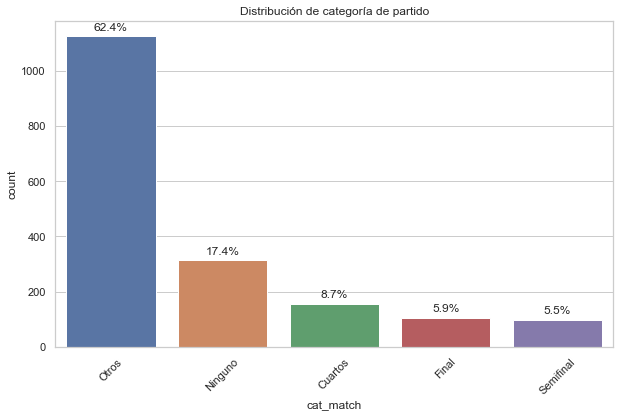

In [7]:
# Distribución de los tipos de partidos
ordered_tag_map = df['cat_match'].value_counts().index

# Crear el gráfico de barras ordenado
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='cat_match', data=df, order=ordered_tag_map)

# Calcular los porcentajes
total_counts = len(df)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / total_counts) * 100
    ax.annotate(f'{percentage:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points')

plt.title('Distribución de categoría de partido')
plt.xticks(rotation=45)  # Opcional: Rotar etiquetas para mayor legibilidad
plt.show()

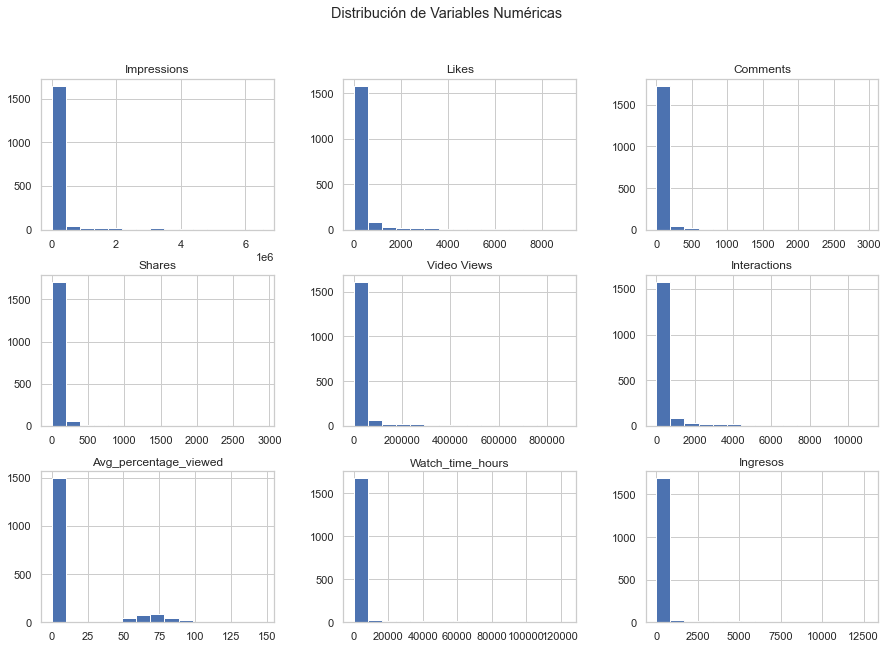

In [23]:
# Crear un histograma para columnas numéricas clave
numerical_cols = ['Impressions', 'Likes', 'Comments', 'Shares', 'Video Views', 'Interactions', 'Avg_percentage_viewed', 'Watch_time_hours', 'Ingresos']

# Crear histogramas para cada columna numérica
df[numerical_cols].hist(bins=15, figsize=(15, 10), layout=(3, 3))
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


* Desigualdad en la distribución: La mayoría de las variables muestran una distribución sesgada hacia la derecha, lo que indica que hay una pequeña proporción de videos que reciben un número muy alto de interacciones, vistas y generan ingresos significativos.
* Baja monetización: La mediana de ingresos es 0, lo que sugiere que la mayoría de los videos no generan ingresos o generan ingresos muy bajos.


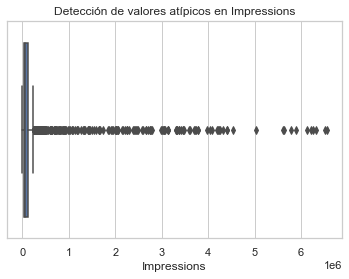

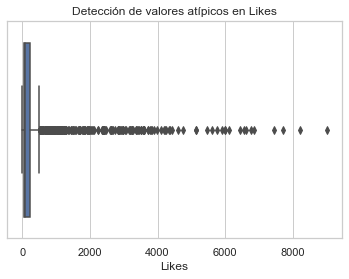

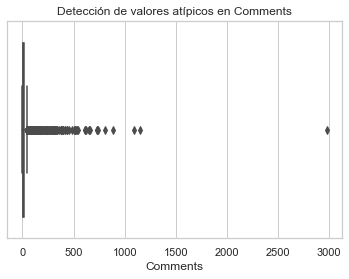

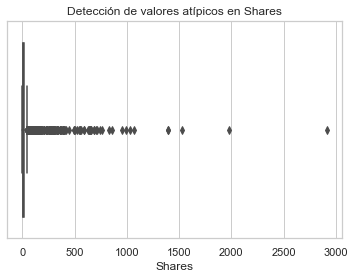

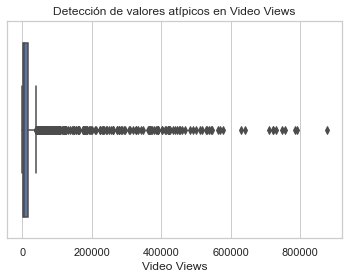

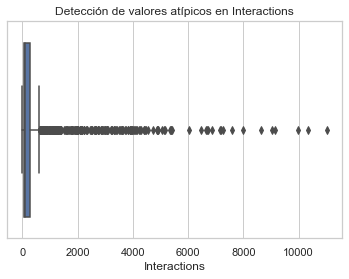

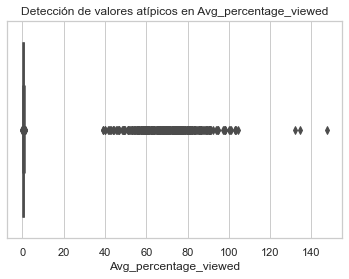

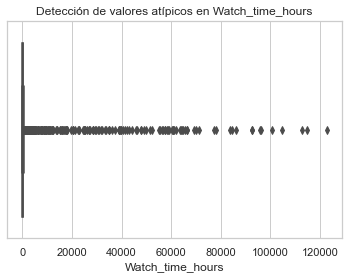

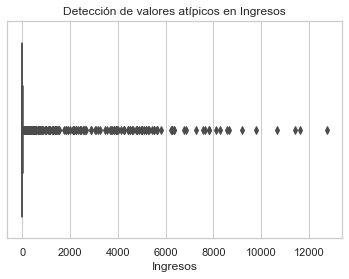

In [9]:
# Ver filas con valores nulos
df[df.isnull().any(axis=1)]

# Identificar posibles valores atípicos en las columnas numéricas
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Detección de valores atípicos en {col}')
    plt.show()


* La mayoría de los videos tienen un número relativamente bajo en todas las métricas, mientras que unos pocos videos muy populares generan una gran cantidad de tráfico.


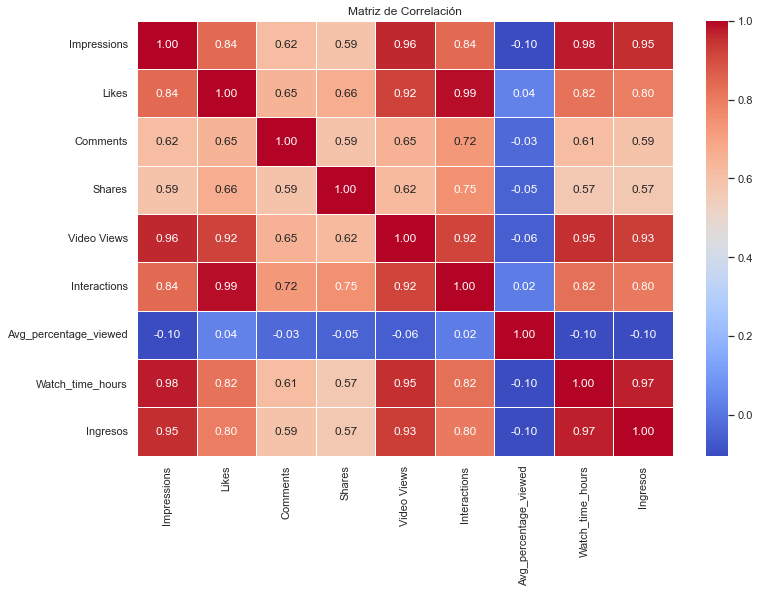

In [12]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor para visualizar la matriz de correlación
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()


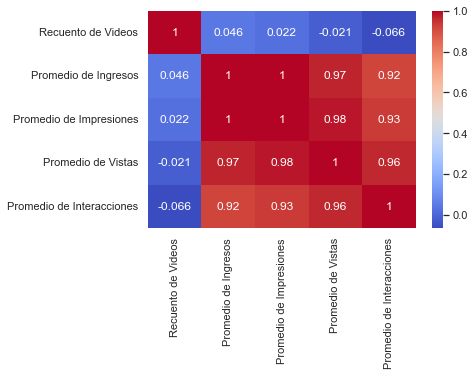

In [20]:
import matplotlib.pyplot as plt

# Crear un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Los videos más populares con más impresiones, likes, vistas, tienden a tener un tiempo de visualización más largo y generan mayores ingresos.

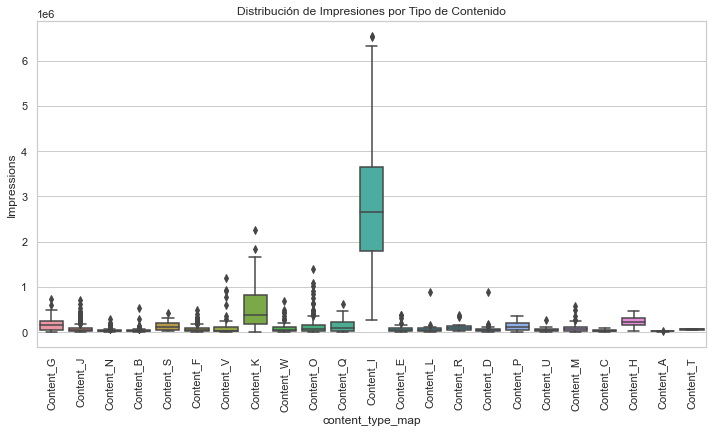

In [25]:
# Box plot para ver la distribución de una variable numérica por tipo de contenido
plt.figure(figsize=(12, 6))
sns.boxplot(x='content_type_map', y='Impressions', data=df)
plt.title('Distribución de Impresiones por Tipo de Contenido')
plt.xticks(rotation=90)
plt.show()


Estadísticas Descriptivas por Tipo de Contenido (ordenadas por mediana):
   content_type_map  count     min      max       mean     median
8         Content_I    107  265542  6554344  2848207.0  2665214.0
10        Content_K     38   10697  2263612   579060.0   388186.0
7         Content_H      7   18535   466186   240885.0   231308.0
6         Content_G     50   10241   730483   183097.0   163917.5
15        Content_P     22   14004   352834   132277.0   126245.5
18        Content_S     24   28333   423713   139028.0   106375.5
16        Content_Q     25   13696   623724   155731.0    98694.0
17        Content_R     16   17752   384553   128486.0    82645.0
14        Content_O    153    2419  1402714   151622.0    75496.0
19        Content_T      5   47725    65147    58718.0    61704.0
12        Content_M     40   11980   584543   111764.0    60993.0
11        Content_L     23   13557   885863    97312.0    58125.0
5         Content_F    147    1114   490672    81809.0    52397.0
9  

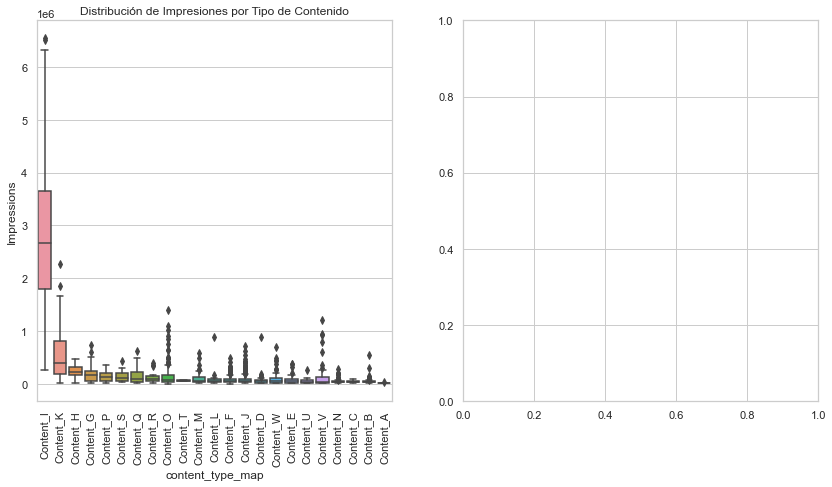

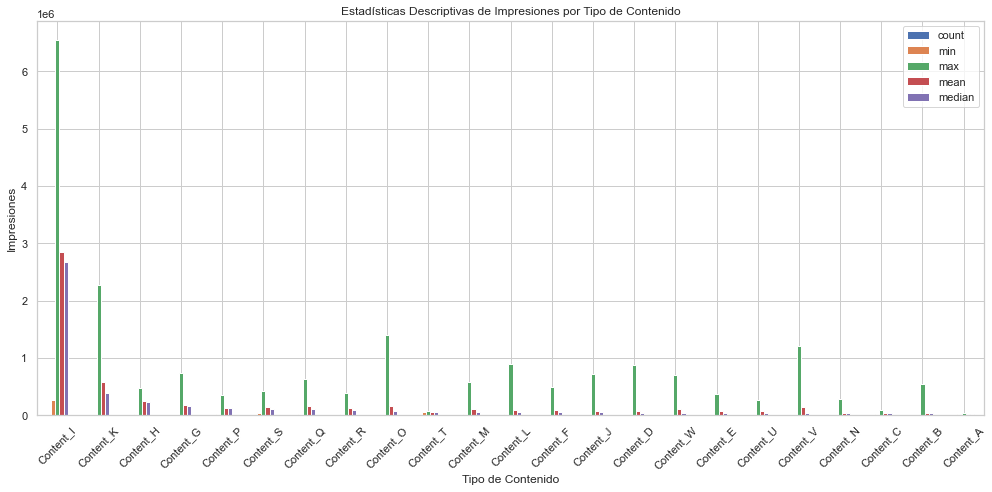

In [22]:
# Calcular estadísticas descriptivas por tipo de contenido, incluyendo recuento
stats_by_content_type = df.groupby('content_type_map')['Impressions'].agg(['count', 'min', 'max', 'mean', 'median'])
stats_by_content_type = stats_by_content_type.reset_index()

# Redondear los valores de 'mean'
stats_by_content_type['mean'] = stats_by_content_type['mean'].round()

# Ordenar por la mediana de impresiones en orden descendente
stats_by_content_type_sorted = stats_by_content_type.sort_values(by='median', ascending=False)

print("Estadísticas Descriptivas por Tipo de Contenido (ordenadas por mediana):")
print(stats_by_content_type_sorted)

# Crear el box plot para visualizar la distribución de impresiones por tipo de contenido
plt.figure(figsize=(14, 7))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='content_type_map', y='Impressions', data=df, order=stats_by_content_type_sorted['content_type_map'])
plt.title('Distribución de Impresiones por Tipo de Contenido')
plt.xticks(rotation=90)

# Bar plot para mostrar estadísticas descriptivas ordenadas por mediana
plt.subplot(1, 2, 2)
stats_by_content_type_sorted.set_index('content_type_map')[['count', 'min', 'max', 'mean', 'median']].plot(kind='bar', figsize=(14, 7))
plt.title('Estadísticas Descriptivas de Impresiones por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Impresiones')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

* Los tipos de contenido "Content_I", "Content_K", "Content_H" y "Content_G" presentan las medianas más altas de impresiones, lo que sugiere que son los más populares en términos generales, sin embargo, es importante tener en cuenta que la distribución de impresiones en estos tipos de contenido también es más dispersa, lo que indica que hay una mayor variabilidad en su desempeño. Cabe destacar que el video con menos impresiones en el Contenido I aún obtuvo un número considerable de visualizaciones, lo que indica un buen desempeño general de este tipo de contenido.


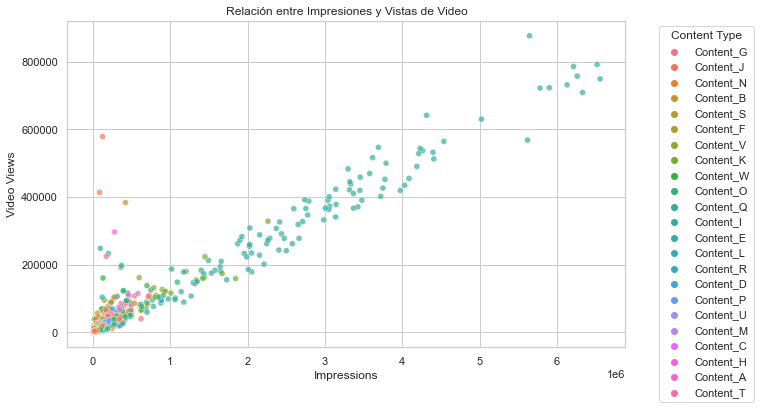

In [13]:
# Scatter plot para explorar la relación entre dos variables numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Video Views', data=df, hue='content_type_map', alpha=0.7)
plt.title('Relación entre Impresiones y Vistas de Video')
plt.xlabel('Impressions')
plt.ylabel('Video Views')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


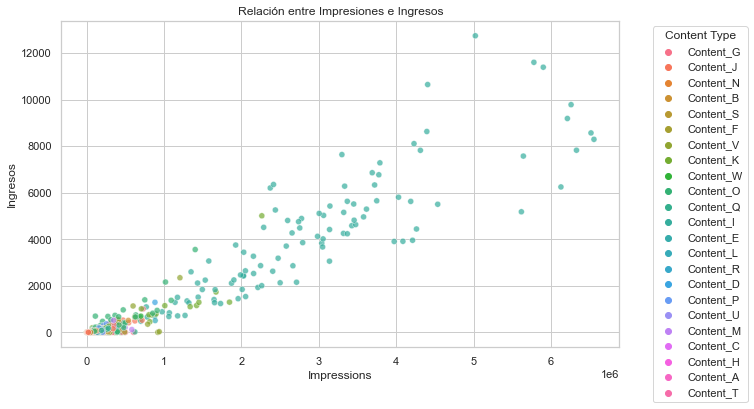

In [14]:
# Scatter plot para explorar la relación entre dos variables numéricas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Impressions', y='Ingresos', data=df, hue='content_type_map', alpha=0.7)
plt.title('Relación entre Impresiones e Ingresos')
plt.xlabel('Impressions')
plt.ylabel('Ingresos')
plt.legend(title='Content Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Tipos de Contenido con Recuento, Total de Impresiones y Promedio de Impresiones (redondeado):
   content_type_map  count  total_impressions  mean_impressions    Popularity
0         Content_A      4              88146             22036  Less Popular
1         Content_B    183            7776366             42494  Less Popular
2         Content_C     15             583795             38920  Less Popular
3         Content_D     51            3632132             71218  Less Popular
4         Content_E     44            3222038             73228  Less Popular
5         Content_F    147           12025851             81809  Less Popular
6         Content_G     50            9154855            183097       Popular
7         Content_H      7            1686193            240885       Popular
8         Content_I    107          304758119           2848207       Popular
9         Content_J    468           34470244             73654  Less Popular
10        Content_K     38           22004275   

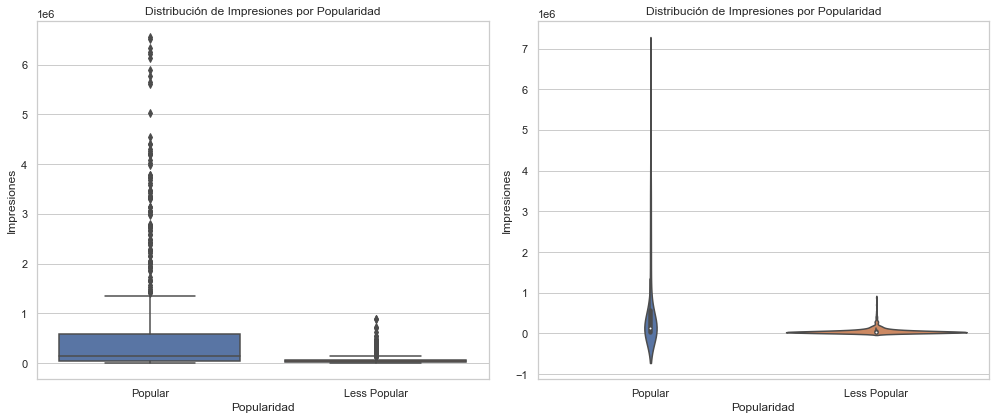

P-Value de Mann-Whitney U: 9.646200684783826e-63


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Calcular el total de impresiones y el recuento por tipo de contenido
total_impressions_per_type = df.groupby('content_type_map')['Impressions'].agg(['count', 'sum']).reset_index()
total_impressions_per_type.columns = ['content_type_map', 'count', 'total_impressions']

# Calcular el promedio de impresiones por tipo de contenido y redondear el valor
total_impressions_per_type['mean_impressions'] = (total_impressions_per_type['total_impressions'] / total_impressions_per_type['count']).round().astype(int)

# Definir el umbral para clasificar los tipos de contenido usando la media de impresiones por video
threshold = total_impressions_per_type['mean_impressions'].median()

# Clasificar los tipos de contenido en populares y menos populares según la media de impresiones por video
total_impressions_per_type['Popularity'] = total_impressions_per_type['mean_impressions'].apply(lambda x: 'Popular' if x > threshold else 'Less Popular')

# Mostrar la tabla de tipos de contenido con recuento, total de impresiones y promedio de impresiones (redondeado)
print("Tipos de Contenido con Recuento, Total de Impresiones y Promedio de Impresiones (redondeado):")
print(total_impressions_per_type)

# Asegúrate de que 'df' tenga la columna 'Popularity'
df = df.merge(total_impressions_per_type[['content_type_map', 'Popularity']], on='content_type_map', how='left')

# Verificar las columnas del DataFrame para confirmar la adición de 'Popularity'
print("Columnas del DataFrame df:")
print(df.columns)

# Verificar los primeros registros para confirmar la adición de 'Popularity'
print("Primeros registros del DataFrame df:")
print(df.head())

# Gráfico de Box Plot
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x='Popularity', y='Impressions', data=df)
plt.title('Distribución de Impresiones por Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Impresiones')

# Gráfico de Violin Plot
plt.subplot(1, 2, 2)
sns.violinplot(x='Popularity', y='Impressions', data=df)
plt.title('Distribución de Impresiones por Popularidad')
plt.xlabel('Popularidad')
plt.ylabel('Impresiones')

plt.tight_layout()
plt.show()

# Análisis Estadístico: Prueba t de Student o Mann-Whitney U
popular_impressions = df[df['Popularity'] == 'Popular']['Impressions']
less_popular_impressions = df[df['Popularity'] == 'Less Popular']['Impressions']

# Si las distribuciones no son normales, usa Mann-Whitney U
_, p_value = stats.mannwhitneyu(popular_impressions, less_popular_impressions)
print(f'P-Value de Mann-Whitney U: {p_value}')


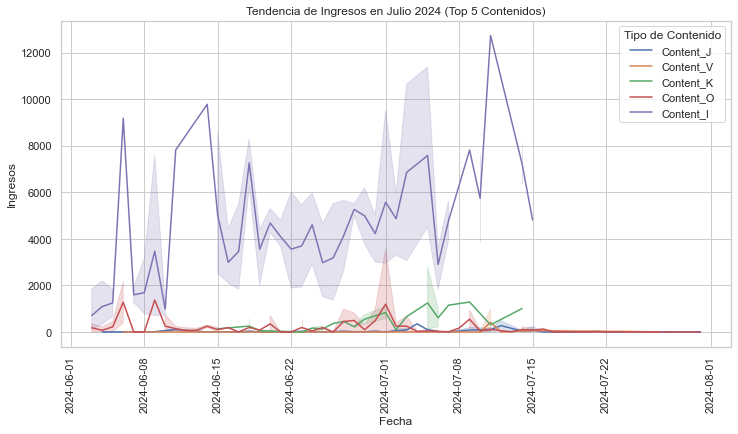

In [39]:
# Agrupar por tipo de contenido y sumar los ingresos
ingresos_por_tipo = df.groupby('content_type_map')['Ingresos'].sum().reset_index()

# Ordenar por ingresos de mayor a menor
ingresos_por_tipo = ingresos_por_tipo.sort_values('Ingresos', ascending=False)

# Seleccionar los top 5 tipos de contenido
top_5 = ingresos_por_tipo.head(5)['content_type_map'].tolist()

# Filtrar el DataFrame original para incluir solo los top 5
df_top_5 = df[df['content_type_map'].isin(top_5)]

# Filtrar los datos para solo julio de 2024
start_date = '2024-06-01'
end_date = '2024-07-31'
df_top_5_july = df_top_5[(df_top_5['Date'] >= start_date) & (df_top_5['Date'] <= end_date)]

# Crear el gráfico de líneas para los top 5
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_5_july, x='Date', y='Ingresos', hue='content_type_map')

# Configurar la rotación de las fechas en el eje x
plt.xticks(rotation=90)

plt.title('Tendencia de Ingresos en Julio 2024 (Top 5 Contenidos)')
plt.xlabel('Fecha')
plt.ylabel('Ingresos')
plt.legend(title='Tipo de Contenido')
plt.show()

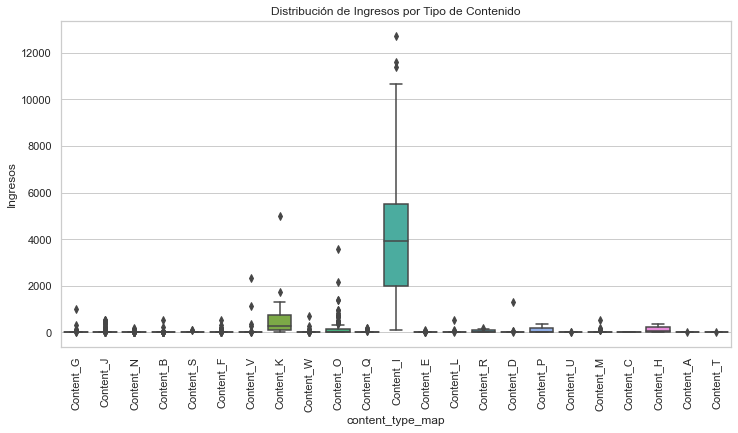

In [40]:
# Box plot para ver la distribución de una variable numérica por tipo de contenido
plt.figure(figsize=(12, 6))
sns.boxplot(x='content_type_map', y='Ingresos', data=df)
plt.title('Distribución de Ingresos por Tipo de Contenido')
plt.xticks(rotation=90)
plt.show()


Estadísticas Descriptivas por Tipo de Contenido (ordenadas por mediana):
   content_type_map  count      min        max    mean    median
8         Content_I    107  109.829  12743.005  4099.0  3902.954
10        Content_K     38    0.000   5007.441   566.0   262.930
7         Content_H      7    0.000    352.975   119.0    66.785
18        Content_S     24    0.000    109.585    13.0     1.975
15        Content_P     22    0.000    366.188   101.0     1.498
16        Content_Q     25    0.000    200.253    34.0     1.479
14        Content_O    153    0.000   3556.206   153.0     1.057
4         Content_E     44    0.000     96.281     7.0     1.026
0         Content_A      4    0.000      0.290     0.0     0.000
21        Content_V     54    0.000   2344.407    78.0     0.000
20        Content_U     12    0.000      5.860     1.0     0.000
19        Content_T      5    0.000      5.073     1.0     0.000
17        Content_R     16    0.000    189.841    40.0     0.000
11        Content

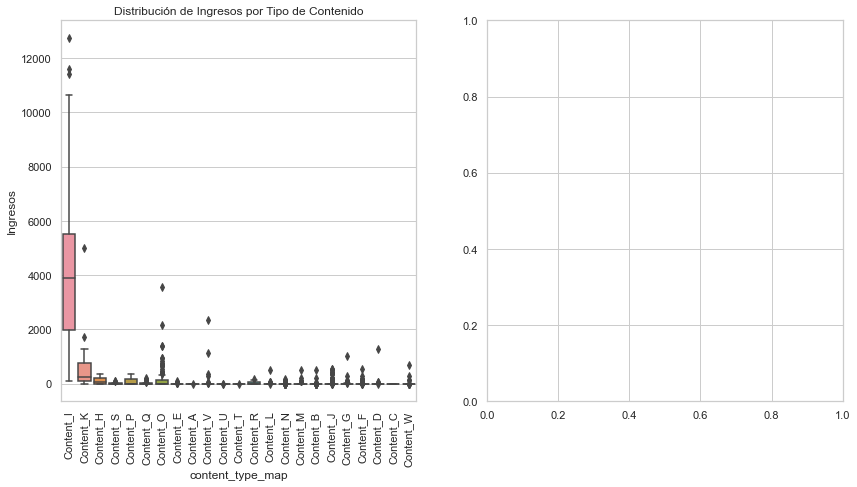

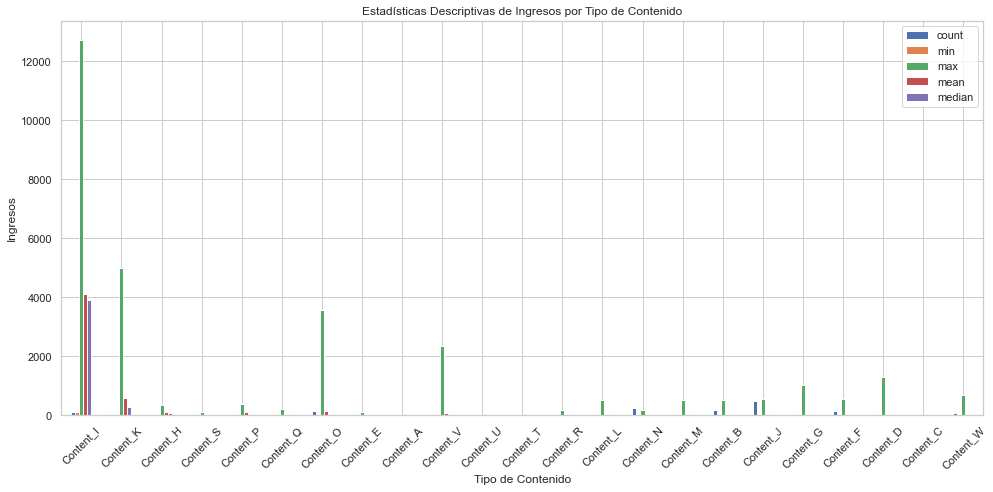

In [41]:
# Calcular estadísticas descriptivas por tipo de contenido, incluyendo recuento
stats_by_content_type = df.groupby('content_type_map')['Ingresos'].agg(['count', 'min', 'max', 'mean', 'median'])
stats_by_content_type = stats_by_content_type.reset_index()

# Redondear los valores de 'mean'
stats_by_content_type['mean'] = stats_by_content_type['mean'].round()

# Ordenar por la mediana de Ingresos en orden descendente
stats_by_content_type_sorted = stats_by_content_type.sort_values(by='median', ascending=False)

print("Estadísticas Descriptivas por Tipo de Contenido (ordenadas por mediana):")
print(stats_by_content_type_sorted)

# Crear el box plot para visualizar la distribución de Ingresos por tipo de contenido
plt.figure(figsize=(14, 7))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='content_type_map', y='Ingresos', data=df, order=stats_by_content_type_sorted['content_type_map'])
plt.title('Distribución de Ingresos por Tipo de Contenido')
plt.xticks(rotation=90)

# Bar plot para mostrar estadísticas descriptivas ordenadas por mediana
plt.subplot(1, 2, 2)
stats_by_content_type_sorted.set_index('content_type_map')[['count', 'min', 'max', 'mean', 'median']].plot(kind='bar', figsize=(14, 7))
plt.title('Estadísticas Descriptivas de Ingresos por Tipo de Contenido')
plt.xlabel('Tipo de Contenido')
plt.ylabel('Ingresos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Estadísticas Descriptivas por Tipo de Video (ordenadas por mediana):
  Video Type  count  min     max     mean  median
1      Video    880  347  876577  55632.0  6304.5
0      Short    920   93  578498  14851.0  5184.0


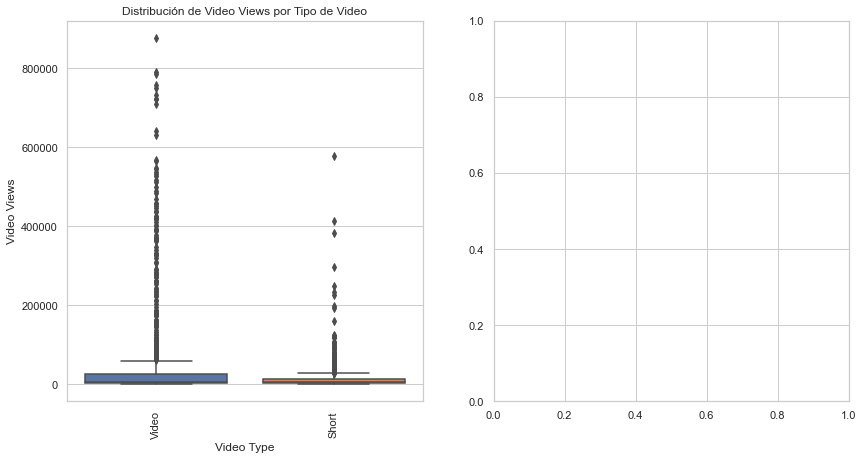

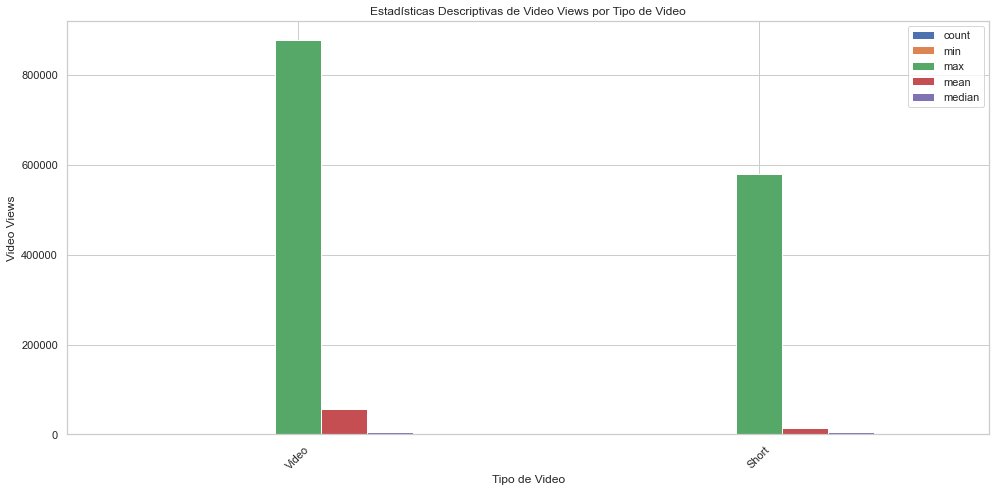

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular estadísticas descriptivas por tipo de video, incluyendo recuento
stats_by_video_type = df.groupby('Video Type')['Video Views'].agg(['count', 'min', 'max', 'mean', 'median'])
stats_by_video_type = stats_by_video_type.reset_index()

# Redondear los valores de 'mean'
stats_by_video_type['mean'] = stats_by_video_type['mean'].round()

# Ordenar por la mediana de Video Views en orden descendente
stats_by_video_type_sorted = stats_by_video_type.sort_values(by='median', ascending=False)

print("Estadísticas Descriptivas por Tipo de Video (ordenadas por mediana):")
print(stats_by_video_type_sorted)

# Crear el box plot para visualizar la distribución de Video Views por tipo de video
plt.figure(figsize=(14, 7))

# Box plot
plt.subplot(1, 2, 1)
sns.boxplot(x='Video Type', y='Video Views', data=df, order=stats_by_video_type_sorted['Video Type'])
plt.title('Distribución de Video Views por Tipo de Video')
plt.xticks(rotation=90)

# Bar plot para mostrar estadísticas descriptivas ordenadas por mediana
plt.subplot(1, 2, 2)
stats_by_video_type_sorted.set_index('Video Type')[['count', 'min', 'max', 'mean', 'median']].plot(kind='bar', figsize=(14, 7))
plt.title('Estadísticas Descriptivas de Video Views por Tipo de Video')
plt.xlabel('Tipo de Video')
plt.ylabel('Video Views')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Modelos predictivos

### Librerías

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import RANSACRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.regression.quantile_regression import QuantReg

### Feature Engineering

In [8]:
# Eliminar columnas no deseadas
columns_to_remove = ['ID', 'partido_map', 'Date']
df = df.drop(columns=columns_to_remove)

In [9]:
# Aplicar One-Hot Encoding con prefijo opcional
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix=categorical_cols)

# Verificar si el proceso fue exitoso
if df_encoded.shape[1] > df.shape[1]:
    print("El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.")
else:
    print("¡Error! El One-Hot Encoding no se ha aplicado correctamente. Verifica los nombres de las columnas y el proceso.")

# Mostrar las primeras 5 filas de algunas de las columnas codificadas
print(df_encoded.head())

# Verificar si hay valores faltantes
print(df_encoded.isnull().sum().sum())  # Imprime la cantidad total de valores faltantes

El One-Hot Encoding se ha aplicado correctamente. Se han creado nuevas columnas.
   Impressions  Likes  Comments  Shares  Video Views  Interactions  \
0        43346    269        18       7         6570           294   
1       106980    396         6      11        19541           413   
2        54898     27         0       2         3777            29   
3        29127     97         5       3         5457           105   
4        13583     61         0       2         1865            63   

   Avg_percentage_viewed  Watch_time_hours  Ingresos  Video Type_Short  ...  \
0                88.6500           42.0660     1.448                 1  ...   
1                86.6500          117.5791     4.330                 1  ...   
2                 0.5355           64.6095     0.000                 0  ...   
3                 0.4866           39.8284     0.000                 1  ...   
4                 0.3725           11.3861     0.000                 1  ...   

   content_type_map_Con

In [10]:
# Información general sobre el dataset
df_encoded.info()

# Resumen estadístico de las columnas numéricas
df_encoded.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Impressions                 1800 non-null   int64  
 1   Likes                       1800 non-null   int64  
 2   Comments                    1800 non-null   int64  
 3   Shares                      1800 non-null   int64  
 4   Video Views                 1800 non-null   int64  
 5   Interactions                1800 non-null   int64  
 6   Avg_percentage_viewed       1800 non-null   float64
 7   Watch_time_hours            1800 non-null   float64
 8   Ingresos                    1800 non-null   float64
 9   Video Type_Short            1800 non-null   uint8  
 10  Video Type_Video            1800 non-null   uint8  
 11  tag_map_Ninguno             1800 non-null   uint8  
 12  tag_map_tag_A               1800 non-null   uint8  
 13  tag_map_tag_B               1800 

,Impressions,Likes,Comments,Shares,Video Views,Interactions,Avg_percentage_viewed,Watch_time_hours,Ingresos,Video Type_Short,...,content_type_map_Content_N,content_type_map_Content_O,content_type_map_Content_P,content_type_map_Content_Q,content_type_map_Content_R,content_type_map_Content_S,content_type_map_Content_T,content_type_map_Content_U,content_type_map_Content_V,content_type_map_Content_W
count,1.800000e+03,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,...,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000,1800.000000
mean,2.594245e+05,372.565000,33.918889,41.368889,34788.382222,447.852778,12.521820,3118.535142,285.656464,0.511111,...,0.141667,0.085000,0.012222,0.013889,0.008889,0.013333,0.002778,0.006667,0.030000,0.031667
std,7.618014e+05,917.982637,115.818978,145.055722,96544.894168,1100.856148,27.125784,12418.181227,1185.492981,0.500015,...,0.348805,0.278959,0.109907,0.117062,0.093887,0.114730,0.052646,0.081400,0.170635,0.175160
min,1.114000e+03,2.000000,0.000000,0.000000,93.000000,2.000000,0.013100,0.501100,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.772675e+04,37.000000,1.000000,1.000000,2757.750000,42.000000,0.514450,21.491650,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.933350e+04,80.000000,4.000000,4.000000,5689.500000,91.000000,0.599650,62.342550,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.126948e+05,224.500000,17.250000,18.000000,17256.250000,273.000000,0.728475,260.492425,3.032250,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.554344e+06,9008.000000,2979.000000,2913.000000,876577.000000,11022.000000,147.410000,122791.645000,12743.005000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# Verificar si hay valores faltantes o datos no numéricos
print(df_encoded.info())  # Esto te permitirá ver si hay algún tipo de dato no numérico

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Impressions                 1800 non-null   int64  
 1   Likes                       1800 non-null   int64  
 2   Comments                    1800 non-null   int64  
 3   Shares                      1800 non-null   int64  
 4   Video Views                 1800 non-null   int64  
 5   Interactions                1800 non-null   int64  
 6   Avg_percentage_viewed       1800 non-null   float64
 7   Watch_time_hours            1800 non-null   float64
 8   Ingresos                    1800 non-null   float64
 9   Video Type_Short            1800 non-null   uint8  
 10  Video Type_Video            1800 non-null   uint8  
 11  tag_map_Ninguno             1800 non-null   uint8  
 12  tag_map_tag_A               1800 non-null   uint8  
 13  tag_map_tag_B               1800 

In [12]:
# Eliminar filas con valores nulos
df_encoded = df_encoded.dropna()

# Verificar si se eliminaron filas
if df_encoded.shape[0] < df.shape[0]:
    print(f"Se eliminaron {df.shape[0] - df_encoded.shape[0]} filas con valores nulos.")
else:
    print("No se encontraron valores nulos en el DataFrame.")

No se encontraron valores nulos en el DataFrame.


In [13]:
# Convertir todos los datos a tipo numérico
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce')

In [14]:
# Información general sobre el dataset
df_encoded.info()

# Estadísticas descriptivas para variables numéricas
numeric_stats = df_encoded.describe(include=[pd.np.number])  # Estadísticas numéricas
print("Estadísticas Descriptivas para Variables Numéricas:")
print(numeric_stats)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 0 to 1799
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Impressions                 1800 non-null   int64  
 1   Likes                       1800 non-null   int64  
 2   Comments                    1800 non-null   int64  
 3   Shares                      1800 non-null   int64  
 4   Video Views                 1800 non-null   int64  
 5   Interactions                1800 non-null   int64  
 6   Avg_percentage_viewed       1800 non-null   float64
 7   Watch_time_hours            1800 non-null   float64
 8   Ingresos                    1800 non-null   float64
 9   Video Type_Short            1800 non-null   uint8  
 10  Video Type_Video            1800 non-null   uint8  
 11  tag_map_Ninguno             1800 non-null   uint8  
 12  tag_map_tag_A               1800 non-null   uint8  
 13  tag_map_tag_B               1800 

/var/folders/rc/05ndkbzs52vc0w2nl67b9jd80000gq/T/ipykernel_64773/9807590.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  numeric_stats = df_encoded.describe(include=[pd.np.number])  # Estadísticas numéricas


### Datos de entrenamiento

Pasos completados:
- Se han seleccionado las columnas relevantes para el análisis.
- Se ha realizado la división en conjuntos de entrenamiento y prueba.
        Conjunto  Número de observaciones
0  Entrenamiento                     1440
1         Prueba                      360


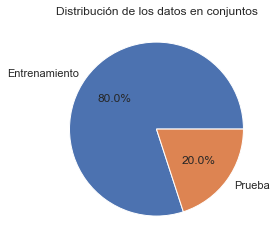

In [63]:
# Separar las variables predictoras y la variable objetivo
X = df_encoded.drop(['Ingresos'], axis=1)  # Variables predictoras
y = df_encoded['Ingresos']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurarse de que X_train y y_train tengan el mismo número de filas
X_train, y_train = X_train.align(y_train, join='inner', axis=0)


# Confirmación de los pasos realizados
print("Pasos completados:\n"
      "- Se han seleccionado las columnas relevantes para el análisis.\n"
      "- Se ha realizado la división en conjuntos de entrenamiento y prueba.")

# Crear un DataFrame para mostrar la división
division_data = {'Conjunto': ['Entrenamiento', 'Prueba'],
                 'Número de observaciones': [len(X_train), len(X_test)]}
df_division = pd.DataFrame(division_data)
print(df_division)

# Visualización opcional (utilizando matplotlib)
import matplotlib.pyplot as plt

plt.pie(df_division['Número de observaciones'], labels=df_division['Conjunto'], autopct='%1.1f%%')
plt.title('Distribución de los datos en conjuntos')
plt.show()

### Modelos

#### Primera Iteración

In [19]:
# 1. Bosques Aleatorios
rf_model = RandomForestRegressor(n_estimators=50, max_depth=20, min_samples_leaf=2, min_samples_split=2, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2. Máquinas de Soporte Vectorial (SVM)
svm_model = SVR(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3. Regresión Robusta (RANSAC)
ransac_model = RANSACRegressor(max_trials=100, min_samples=50, residual_threshold=10, random_state=42)
try:
    ransac_model.fit(X_train, y_train)
    y_pred_ransac = ransac_model.predict(X_test)
except ValueError as e:
    print(f"Error en RANSAC: {e}")
    y_pred_ransac = np.zeros_like(y_test)

### Evaluación de modelos

In [20]:
# Evaluar el rendimiento de los modelos
models = ['Random Forest', 'SVM', 'RANSAC']
predictions = [y_pred_rf, y_pred_svm, y_pred_ransac]

for i, pred in enumerate(predictions):
    print(f"Modelo: {models[i]}")
    print(f"Error Absoluto Medio: {mean_absolute_error(y_test, pred)}")
    print(f"Error Cuadrático Medio: {mean_squared_error(y_test, pred)}\n")


Modelo: Random Forest
Error Absoluto Medio: 45.868076042552495
Error Cuadrático Medio: 78131.16281417562

Modelo: SVM
Error Absoluto Medio: 230.7822205205495
Error Cuadrático Medio: 1302241.0193220833

Modelo: RANSAC
Error Absoluto Medio: 141.7839957776444
Error Cuadrático Medio: 485560.906191025



El modelo con menor error es Random Forest, pero aún así se deben ajustar los hiperparámetros de los modelos para un mejor resultado

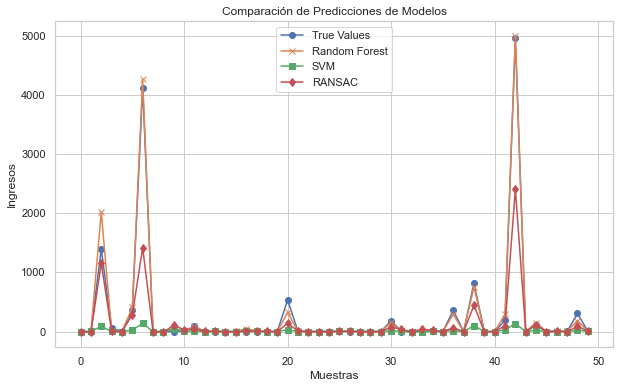

In [21]:
# Gráfico para comparar predicciones
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:50], label='True Values', marker='o')
plt.plot(y_pred_rf[:50], label='Random Forest', marker='x')
plt.plot(y_pred_svm[:50], label='SVM', marker='s')
plt.plot(y_pred_ransac[:50], label='RANSAC', marker='d')
plt.legend()
plt.title('Comparación de Predicciones de Modelos')
plt.xlabel('Muestras')
plt.ylabel('Ingresos')
plt.show()

#### Segunda iteración

### Random Forest

#### Ajuste de hiperparámetros
* Configurar GridSearchCV

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Definir el rango de hiperparámetros para la búsqueda
param_grid_rf = {
    'n_estimators': [50, 100, 200],           # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],           # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4],             # Número mínimo de muestras requeridas en una hoja
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

print("Mejores parámetros para Random Forest:")
print(best_params_rf)

# Evaluar el modelo ajustado
y_pred_rf = best_rf_model.predict(X_test)
print("Error absoluto medio (Random Forest):", mean_absolute_error(y_test, y_pred_rf))
print("Error cuadrático medio (Random Forest):", mean_squared_error(y_test, y_pred_rf))


Mejores parámetros para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Error absoluto medio (Random Forest): 46.42035989088648
Error cuadrático medio (Random Forest): 64638.0156332831


### Variables más importantes

In [23]:
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 variables más importantes
print("Importancia de las variables (Top 10):")
for f in range(10):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Opcional: Eliminar variables con baja importancia y ajustar el modelo nuevamente


Importancia de las variables (Top 10):
Watch_time_hours: 0.8388763766712443
Impressions: 0.09097046073745269
Video Views: 0.03056660822119344
Likes: 0.01501016801839957
Interactions: 0.014091865456235912
Avg_percentage_viewed: 0.0038621023931657596
Shares: 0.0036458605413224156
Comments: 0.0022748020231177215
tag_map_tag_B: 0.00035775308468037923
tag_map_tag_D: 0.0001580195382289215


### Tercera Iteración

In [53]:
# Eliminar columnas no deseadas
columns_to_remove = ['Watch_time_hours','Impressions','Video Views']
df_encoded = df_encoded.drop(columns=columns_to_remove)

In [54]:
# Separar las variables predictoras y la variable objetivo
X = df_encoded.drop(['Ingresos'], axis=1)  # Variables predictoras
y = df_encoded['Ingresos']  # Variable objetivo

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurarse de que X_train y y_train tengan el mismo número de filas
X_train, y_train = X_train.align(y_train, join='inner', axis=0)

In [55]:
# Inicializar el modelo de Random Forest con los mejores parámetros encontrados
best_rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

In [56]:
# Ajustar el modelo con los datos sin Watch_time_hours
best_rf_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10, min_samples_leaf=4, n_estimators=50,
                      random_state=42)

In [57]:
# Evaluar el modelo ajustado
y_pred_rf_reduced = best_rf_model.predict(X_test)
print("Error absoluto medio (Random Forest sin Watch_time_hours):", mean_absolute_error(y_test, y_pred_rf_reduced))
print("Error cuadrático medio (Random Forest sin Watch_time_hours):", mean_squared_error(y_test, y_pred_rf_reduced))

# Obtener y mostrar la importancia de las variables del modelo ajustado
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importancia de las variables (Top 10 del modelo sin Watch_time_hours):")
for f in range(min(10, len(indices))):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

Error absoluto medio (Random Forest sin Watch_time_hours): 64.73154825062905
Error cuadrático medio (Random Forest sin Watch_time_hours): 83007.89551884787
Importancia de las variables (Top 10 del modelo sin Watch_time_hours):
content_type_map_Content_I: 0.6046575739849045
Likes: 0.18443266969380903
Interactions: 0.11800397319908212
Shares: 0.03562421018642779
Comments: 0.019951214734505653
Avg_percentage_viewed: 0.017240847068041222
Video Type_Short: 0.009916235888218206
Video Type_Video: 0.005856198395834119
content_type_map_Content_K: 0.002322602050493546
tag_map_tag_D: 0.0006624288566617728


Al quitar variables evidentemente relacionadas con la monetización como Watch time, Impressions y Video Views, el modelo de Random Forest detecta al contenido I como el valor que más influye en los ingreso, seguido por las interacciones y el porcentaje visto.

### Cuarta iteración

#### Se vuelven a incluir las variables eliminadas y se hace Ajuste de umbral de importancia para disminuir variables

In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Eliminar variables con baja importancia
threshold = 0.01  # Umbral de importancia para mantener variables
important_features = [feature for feature, importance in zip(X_train.columns, importances) if importance > threshold]

# Redefinir X_train y X_test con las variables importantes
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Ajustar el modelo con las nuevas características
rf_model_reduced = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

# Ajustar el modelo
rf_model_reduced.fit(X_train_reduced, y_train)

# Evaluar el modelo ajustado
y_pred_rf_reduced = rf_model_reduced.predict(X_test_reduced)
print("Error absoluto medio (Random Forest con características importantes):", mean_absolute_error(y_test, y_pred_rf_reduced))
print("Error cuadrático medio (Random Forest con características importantes):", mean_squared_error(y_test, y_pred_rf_reduced))

# Mostrar las 10 variables más importantes del nuevo modelo
importances_reduced = rf_model_reduced.feature_importances_
indices_reduced = np.argsort(importances_reduced)[::-1]

print("Importancia de las variables (Top 10 del modelo reducido):")
for f in range(min(10, len(indices_reduced))):
    print(f"{X_train_reduced.columns[indices_reduced[f]]}: {importances_reduced[indices_reduced[f]]}")


Error absoluto medio (Random Forest con características importantes): 53.17499689998703
Error cuadrático medio (Random Forest con características importantes): 68692.62390125993
Importancia de las variables (Top 10 del modelo reducido):
Watch_time_hours: 0.8652469663532796
Impressions: 0.0880129334049209
Likes: 0.024567339082499126
Shares: 0.022172761159300388


### Quinta Iteración

### Multicolinealidad

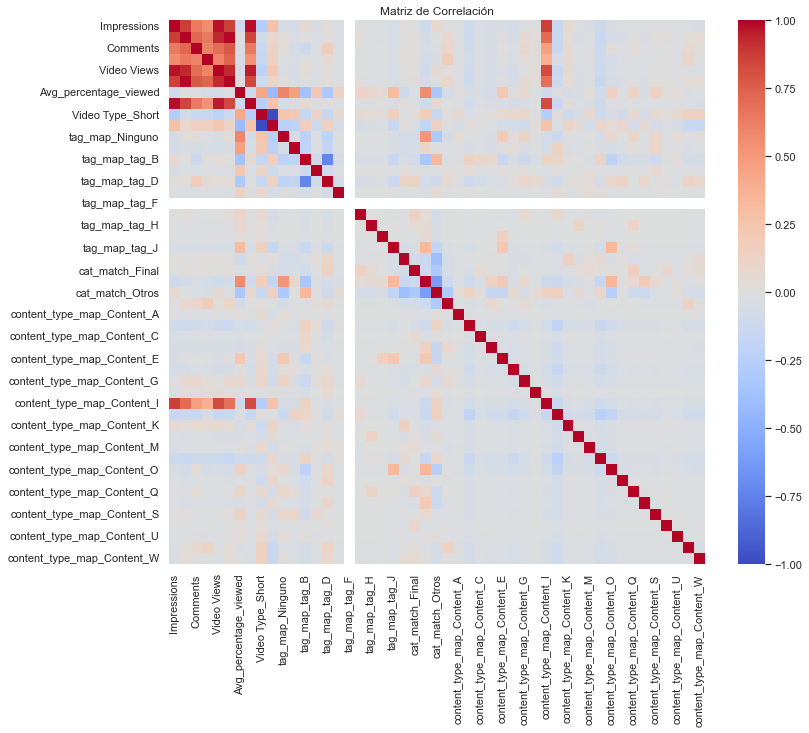

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
corr_matrix = X_train.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()


### Análisis de Componentes Principales (PCA)

In [27]:
from sklearn.decomposition import PCA

# Ajustar PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Mostrar la varianza explicada por cada componente
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)


Varianza explicada por cada componente: [9.99149466e-01 8.38628583e-04 1.15318596e-05 3.36933396e-07
 2.92837066e-08 6.37762814e-09 1.12796625e-09 7.21639946e-13
 5.73942185e-13 4.03611381e-13 3.22010345e-13 2.10849910e-13
 1.69961958e-13 1.27931641e-13 1.12984872e-13 1.06231362e-13
 8.94442333e-14 7.31792737e-14 7.16087073e-14 5.08501385e-14
 4.78755763e-14 4.41557072e-14 4.15336974e-14 3.93835472e-14
 3.82556888e-14 3.50690121e-14 2.72402134e-14 2.56877473e-14
 2.19702767e-14 2.10112307e-14 1.94096440e-14 1.93430202e-14
 1.87530404e-14 1.43882086e-14 1.31728447e-14 1.23347354e-14
 1.10263880e-14 6.02595432e-15 5.54438348e-15 4.64053398e-15
 4.44515398e-15 3.53017057e-15 1.20200888e-15 1.97047488e-31
 9.82688696e-33 9.82688696e-33 9.82688696e-33 9.82688696e-33
 9.82688696e-33]


In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Aplicar PCA
pca = PCA(n_components=0.95)  # Mantener el 95% de la varianza
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Definir el rango de hiperparámetros para la búsqueda
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search_rf.fit(X_train_pca, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

# Evaluar el modelo ajustado
y_pred_rf = best_rf_model.predict(X_test_pca)
print("Error absoluto medio (Random Forest con PCA):", mean_absolute_error(y_test, y_pred_rf))
print("Error cuadrático medio (Random Forest con PCA):", mean_squared_error(y_test, y_pred_rf))


Error absoluto medio (Random Forest con PCA): 76.2229898284269
Error cuadrático medio (Random Forest con PCA): 155920.45890426383


### Sexta Iteración

#### Aplicar validación cruzada

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Redefinir el modelo de Random Forest con los mejores parámetros
rf_model = RandomForestRegressor(
    max_depth=10,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=50,
    random_state=42
)

# Realizar la validación cruzada
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los scores negativos a positivos para MSE
mse_scores = -cv_scores

# Calcular y mostrar las métricas de evaluación
print("Error cuadrático medio (MSE) en cada fold de la validación cruzada:")
print(mse_scores)

print("\nPromedio del Error cuadrático medio (MSE) de la validación cruzada:", np.mean(mse_scores))
print("Desviación estándar del Error cuadrático medio (MSE) de la validación cruzada:", np.std(mse_scores))


Error cuadrático medio (MSE) en cada fold de la validación cruzada:
[ 81744.39452232 103951.29185532  68645.3945958  209248.60885927
  69452.11481235]

Promedio del Error cuadrático medio (MSE) de la validación cruzada: 106608.36092901186
Desviación estándar del Error cuadrático medio (MSE) de la validación cruzada: 52881.13231582389


In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd

# Definir el rango de hiperparámetros para la búsqueda
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Inicializar el modelo de Random Forest
rf_model = RandomForestRegressor(random_state=42)

# Configurar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, 
                               cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search_rf.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_rf = grid_search_rf.best_params_
best_rf_model = grid_search_rf.best_estimator_

print("Mejores parámetros para Random Forest:")
print(best_params_rf)

# Evaluar el modelo ajustado
y_pred_rf = best_rf_model.predict(X_test)
print("Error absoluto medio (Random Forest):", mean_absolute_error(y_test, y_pred_rf))
print("Error cuadrático medio (Random Forest):", mean_squared_error(y_test, y_pred_rf))

# Importancia de las variables
importances = best_rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Mostrar las 10 variables más importantes
print("Importancia de las variables (Top 10):")
for f in range(10):
    print(f"{X_train.columns[indices[f]]}: {importances[indices[f]]}")

# Opcional: Eliminar variables con baja importancia
threshold = 0.01  # Umbral de importancia para mantener variables
important_features = [feature for feature, importance in zip(X_train.columns, importances) if importance > threshold]

# Redefinir X_train y X_test con las variables importantes
X_train_reduced = X_train[important_features]
X_test_reduced = X_test[important_features]

# Ajustar el modelo con las nuevas características
rf_model_reduced = RandomForestRegressor(
    **best_params_rf,
    random_state=42
)

# Ajustar el modelo
rf_model_reduced.fit(X_train_reduced, y_train)

# Evaluar el modelo ajustado
y_pred_rf_reduced = rf_model_reduced.predict(X_test_reduced)
print("Error absoluto medio (Random Forest con características importantes):", mean_absolute_error(y_test, y_pred_rf_reduced))
print("Error cuadrático medio (Random Forest con características importantes):", mean_squared_error(y_test, y_pred_rf_reduced))

# Validación Cruzada
cv_scores = cross_val_score(rf_model_reduced, X_train_reduced, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores
print("Error cuadrático medio (MSE) en cada fold de la validación cruzada:")
print(cv_mse)
print("Promedio del Error cuadrático medio (MSE) de la validación cruzada:", np.mean(cv_mse))
print("Desviación estándar del Error cuadrático medio (MSE) de la validación cruzada:", np.std(cv_mse))


Mejores parámetros para Random Forest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Error absoluto medio (Random Forest): 46.42035989088648
Error cuadrático medio (Random Forest): 64638.0156332831
Importancia de las variables (Top 10):
Watch_time_hours: 0.8388763766712443
Impressions: 0.09097046073745269
Video Views: 0.03056660822119344
Likes: 0.01501016801839957
Interactions: 0.014091865456235912
Avg_percentage_viewed: 0.0038621023931657596
Shares: 0.0036458605413224156
Comments: 0.0022748020231177215
tag_map_tag_B: 0.00035775308468037923
tag_map_tag_D: 0.0001580195382289215
Error absoluto medio (Random Forest con características importantes): 47.30334647737808
Error cuadrático medio (Random Forest con características importantes): 60958.09806359697
Error cuadrático medio (MSE) en cada fold de la validación cruzada:
[ 83763.34902264 104908.05991884  62740.41818305 223983.99104354
  61634.95894364]
Promedio del Error cuadrático medio (MSE) de la 

### Séptima iteración

Recomendaciones de la validación cruzada

In [71]:
pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.1 MB 969 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [72]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Definir el rango de hiperparámetros para la búsqueda
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Inicializar el modelo XGBoost
xgb_model = XGBRegressor(random_state=42)

# Configurar RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist_xgb, 
                                        n_iter=50, cv=5, n_jobs=-1, scoring='neg_mean_squared_error', 
                                        random_state=42)

# Ajustar el modelo
random_search_xgb.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_

print("Mejores parámetros para XGBoost:")
print(best_params_xgb)

# Evaluar 


Mejores parámetros para XGBoost:
{'subsample': 1.0, 'n_estimators': 50, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 1.0}


In [73]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

# Definir el modelo XGBoost con los mejores parámetros
xgb_model = xgb.XGBRegressor(
    subsample=1.0,
    n_estimators=50,
    max_depth=6,
    learning_rate=0.2,
    colsample_bytree=1.0,
    random_state=42
)

# Ajustar el modelo
xgb_model.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)

print("Error absoluto medio (XGBoost):", mae_xgb)
print("Error cuadrático medio (XGBoost):", mse_xgb)

# Validación cruzada
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convertir los puntajes negativos de MSE a MSE positivo
cv_scores = -cv_scores

print("Error cuadrático medio (MSE) en cada fold de la validación cruzada:")
print(cv_scores)

print("Promedio del Error cuadrático medio (MSE) de la validación cruzada:", cv_scores.mean())
print("Desviación estándar del Error cuadrático medio (MSE) de la validación cruzada:", cv_scores.std())


Error absoluto medio (XGBoost): 56.09818659091658
Error cuadrático medio (XGBoost): 89092.6084483751
Error cuadrático medio (MSE) en cada fold de la validación cruzada:
[111674.34757284  42697.62160586  93163.14183805 210335.2582106
 126393.73441561]
Promedio del Error cuadrático medio (MSE) de la validación cruzada: 116852.82072859106
Desviación estándar del Error cuadrático medio (MSE) de la validación cruzada: 54620.52028066634


El mejor modelo fue el inicial con 
Modelo: Random Forest
Error Absoluto Medio: 45.868076042552495
Error Cuadrático Medio: 78131.16281417562

### SVM

In [75]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros para la búsqueda
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 'scale']
}


# Inicializar el modelo SVM
svm_model = SVR()

# Configurar GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, 
                                cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search_svm.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

print("Mejores parámetros para SVM:")
print(best_params_svm)

# Evaluar el modelo ajustado
y_pred_svm = best_svm_model.predict(X_test)
print("Error absoluto medio (SVM):", mean_absolute_error(y_test, y_pred_svm))
print("Error cuadrático medio (SVM):", mean_squared_error(y_test, y_pred_svm))


KeyboardInterrupt: 

In [76]:
pip install tqdm


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Definir el rango de hiperparámetros para la búsqueda
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 'scale']
}


# Inicializar el modelo SVM
svm_model = SVR()

# Configurar GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, 
                                cv=5, n_jobs=-1, scoring='neg_mean_squared_error')

# Ajustar el modelo
grid_search_svm.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor modelo
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

print("Mejores parámetros para SVM:")
print(best_params_svm)

# Evaluar el modelo ajustado
y_pred_svm = best_svm_model.predict(X_test)
print("Error absoluto medio (SVM):", mean_absolute_error(y_test, y_pred_svm))
print("Error cuadrático medio (SVM):", mean_squared_error(y_test, y_pred_svm))


NameError: name 'X_train' is not defined

### RANSAC

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
from sklearn.model_selection import KFold

# Definir el rango de hiperparámetros para la búsqueda
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.01, 0.1, 'scale']
}

# Inicializar el modelo SVM
svm_model = SVR()

# Crear un generador KFold para añadir tqdm
cv = KFold(n_splits=5)

# Usar GridSearchCV con tqdm para la barra de progreso
grid_search_svm = GridSearchCV(
    estimator=svm_model, 
    param_grid=param_grid_svm, 
    cv=cv.split(X_train), 
    n_jobs=-1, 
    scoring='neg_mean_squared_error',
    verbose=0
)

# Ajustar el modelo con tqdm para mostrar la barra de progreso
for _ in tqdm(grid_search_svm.fit(X_train, y_train), total=len(param_grid_svm['C']) * len(param_grid_svm['kernel']) * len(param_grid_svm['gamma'])):
    pass

# Obtener los mejores parámetros y el mejor modelo
best_params_svm = grid_search_svm.best_params_
best_svm_model = grid_search_svm.best_estimator_

print("Mejores parámetros para SVM:")
print(best_params_svm)

# Evaluar el modelo ajustado
y_pred_svm = best_svm_model.predict(X_test)
print("Error absoluto medio (SVM):", mean_absolute_error(y_test, y_pred_svm))
print("Error cuadrático medio (SVM):", mean_squared_error(y_test, y_pred_svm))
